# DATA220_Section23_Math Method for Data Analysis
## Pair Programming Lab1

### Aiswarya Raghavadesikan (014574599) 
### Aryama Ray (017401124)

## Introduction

   Data Analysis is the most crucial segment of data validation and exploration. This project will focus mostly on three different kinds of datasets segmented into three different parts. The project focuses on three different sectors/domains such as Healthcare, Real estates and Stock Market as three parts respectively.

   The  Healthcare domain datasets illustrate the impact on life expectancies in various people based on certain factors such as lifestyle and habits. The Real Estate dataset focuses on the housing price at various cities in Washington state, United States. While the Alphabet’s historical Stock market performances project the performances of the company in the share market.


## Part 1 : heart_train Dataset

#### About the data:
   Each following row contains the information of one patient. The first row is the name of the observed variables. There are 10 variables:

● sbp: Systolic blood pressure

● tobacco: Cumulative tobacco consumption, in kg

● ldl: Low-density lipoprotein cholesterol

● adiposity: Adipose tissue concentration

● famhist: Family history of heart disease (1=Present, 0=Absent)

● typea: Score on test designed to measure type-A behavior

● obesity: Obesity

● alcohol: Current consumption of alcohol

● age: Age of subject

● chd: Coronary heart disease at baseline; 1=Yes 0=No

chd=0 means alive and chd=1 means dead

## Analysis and findings of the requirement

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading heart_train dataset

In [99]:
heart_train= pd.read_csv('heart-train.csv')

In [100]:
heart_train.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1
1  132     6.20  6.47      36.21  Present     62    30.77    14.14   45    0
2  142     4.05  3.38      16.20   Absent     59    20.81     2.62   38    0
3  114     4.08  4.59      14.60  Present     62    23.11     6.72   58    1
4  114     0.00  3.83      19.40  Present     49    24.86     2.49   29    0

### Q1. Identify the dataset columns into nominal, categorical, continuous, etc. 

In [101]:
heart_train.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [102]:
heart_train.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

**Categorical data:**
- chd = categorical data (Yes/No)
- famhist = categorical data (Present/Absent)

**Categorical converted to numerical value:**
- chd = Numerical data (0/1)

**Continuous data:**
- tobacco = continuous numerical (float)
- alcohol = continuous numerical (float)
- obesity = continuous numerical (float)
- adiposity = continuous numerical (float)
- ldl = continuous numerical (float)

**Discrete data:**
- typea = discrete numerical (int)
- age = discrete numerical (int)
- sbp = discrete numerical (int)



In [103]:
heart_train.famhist.unique()

array(['Present', 'Absent'], dtype=object)

**Observations:**

- chd is the target variable. 
- famhist is categorical variable and has 2 values- ['Present', 'Absent']

In [104]:
heart_train.index

RangeIndex(start=0, stop=412, step=1)

## Q2.Present insight about the data 

In [105]:
#Dataset has 412 rows and 10 features.
heart_train.shape

(412, 10)

In [106]:
#Lets explore different features in the dataset
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        412 non-null    int64  
 1   tobacco    412 non-null    float64
 2   ldl        412 non-null    float64
 3   adiposity  412 non-null    float64
 4   famhist    412 non-null    object 
 5   typea      412 non-null    int64  
 6   obesity    412 non-null    float64
 7   alcohol    412 non-null    float64
 8   age        412 non-null    int64  
 9   chd        412 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 32.3+ KB


So there is no null value in each column of the dataset.
Now we will explore the feature to get some insights from them.

### Exploring tobacco consumption data

In [107]:
heart_train['tobacco'].describe()

count    412.000000
mean       3.666262
std        4.518501
min        0.000000
25%        0.037500
50%        1.805000
75%        5.850000
max       27.400000
Name: tobacco, dtype: float64

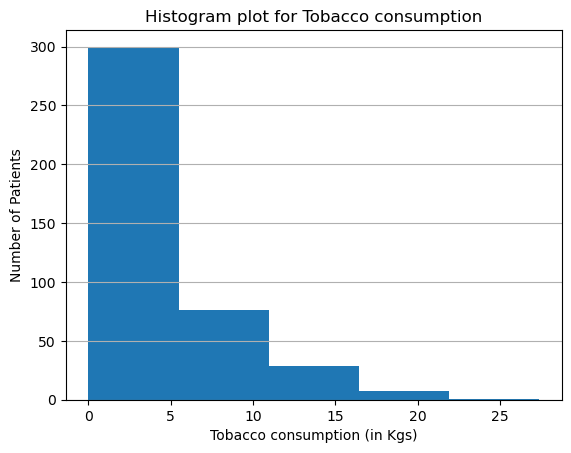

In [108]:
plt.hist(heart_train['tobacco'],bins=5)
plt.title('Histogram plot for Tobacco consumption')
plt.xlabel('Tobacco consumption (in Kgs)')
plt.ylabel('Number of Patients')
plt.grid(axis='y')

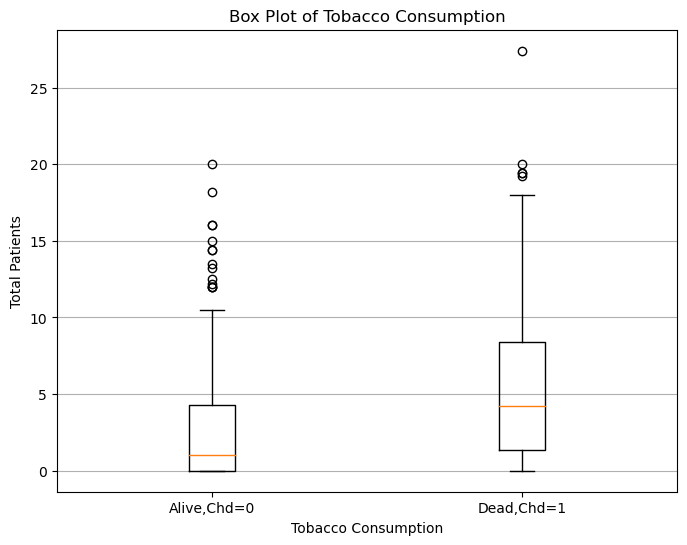

In [109]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of Tobacco Consumption')

plt.xlabel('Tobacco Consumption')
plt.ylabel('Total Patients')
plt.grid(axis='y')

box_data=[heart_train['tobacco'][(heart_train['chd']==0)],heart_train['tobacco'][(heart_train['chd']==1)]]

plt.boxplot(box_data,labels=['Alive,Chd=0', 'Dead,Chd=1'])
plt.show()

### Alcohol Data Exploration

- Checking the range of Alcohol values (min, max and average).
- Categorizing the Alcohol consumption based on level (Very Low, Low, Medium, High, Very High and Extreme).
- Visualizations based on bar chart, box plot and histogram to represent the Alcohol data.
- Histogram to represent the continuous variable values (alcohol, tobacco, adiposity and obesity) data distribution.  


In [110]:
print("Min Alcohol consumption:", heart_train['alcohol'].min())
print("Average Alcohol consumption:",round(heart_train['alcohol'].mean(),2))
print("Max Alcohol consumption:", heart_train['alcohol'].max())

Min Alcohol consumption: 0.0
Average Alcohol consumption: 18.03
Max Alcohol consumption: 145.29


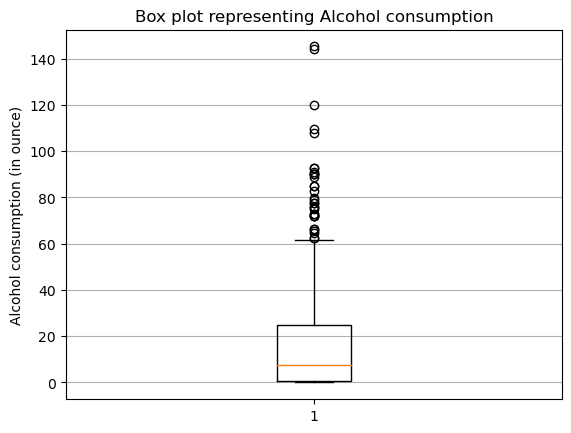

In [111]:
plt.boxplot(heart_train['alcohol'])
plt.title('Box plot representing Alcohol consumption')
plt.ylabel('Alcohol consumption (in ounce)')
plt.grid(axis='y')

**Observation:**
   - The median value Alcohol consumption is 18ounce approximately.
   - There exisits very few occurences where the alcohol consumptione exceeds 60+ ounces.


In [112]:
conditions = [
    (heart_train['alcohol'] <= 5.99),
    (heart_train['alcohol'] <= 11.99),
    (heart_train['alcohol'] <= 24.99),
    (heart_train['alcohol'] <= 59.99),
    (heart_train['alcohol'] <= 100),
    (heart_train['alcohol'] > 100)
]
categories = ['Very Low', 'Low', 'Medium','High', 'Very High', 'Extreme']

heart_train['alcohol_category'] = np.select(conditions, categories, default='Unknown')


heart_train.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd  \
0  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1   
1  132     6.20  6.47      36.21  Present     62    30.77    14.14   45    0   
2  142     4.05  3.38      16.20   Absent     59    20.81     2.62   38    0   
3  114     4.08  4.59      14.60  Present     62    23.11     6.72   58    1   
4  114     0.00  3.83      19.40  Present     49    24.86     2.49   29    0   

  alcohol_category  
0             High  
1           Medium  
2         Very Low  
3              Low  
4         Very Low

#### Exploring LDL (Low-density lipoprotein cholesterol) data 

- Plotting histogram of LDL (mg/dL) to explore the distribution.
- Box plot visualization shows categorization of LDL (mg/dL) vs chd values (chd=0;Alive and chd=1;Dead).

In [113]:
heart_train['ldl'].describe()

count    412.000000
mean       4.589539
std        1.883744
min        0.980000
25%        3.240000
50%        4.225000
75%        5.527500
max       14.160000
Name: ldl, dtype: float64

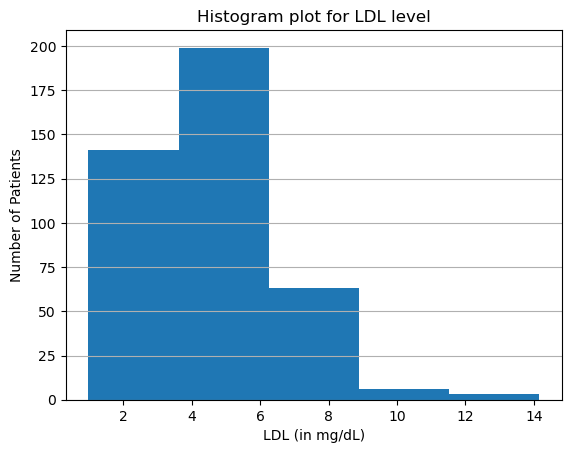

In [114]:
plt.hist(heart_train['ldl'],bins=5)
plt.title('Histogram plot for LDL level')
plt.xlabel('LDL (in mg/dL)')
plt.ylabel('Number of Patients')
plt.grid(axis='y')

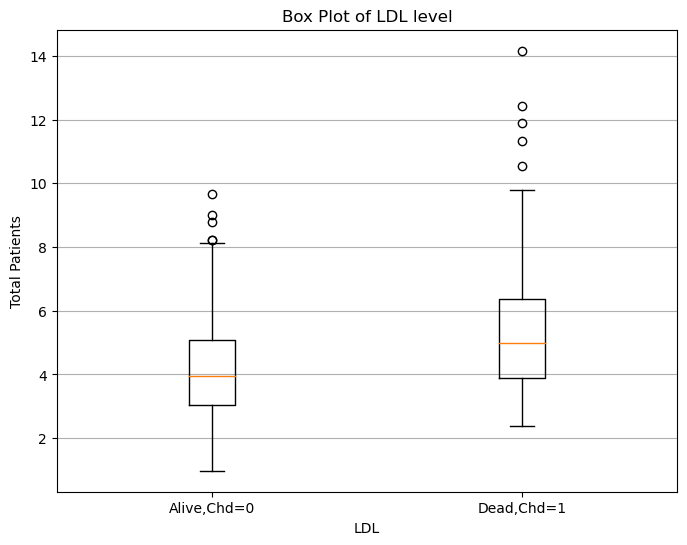

In [115]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of LDL level')

plt.xlabel('LDL')
plt.ylabel('Total Patients')
plt.grid(axis='y')

box_data=[heart_train['ldl'][(heart_train['chd']==0)],heart_train['ldl'][(heart_train['chd']==1)]]

plt.boxplot(box_data,labels=['Alive,Chd=0', 'Dead,Chd=1'])
plt.show()

Observation:

From histogram plot it is evident that more number of patients have ldl values in the range 4 to 6 mg/dL.
From the box plot it can be observed that there exists more outliers for chd=1 over chd=0.
For chd=0 case, there exists more patients having higher concentration of ldl which indicates "ldl" may not be the only factor leading to chd.

#### Exploring Obesity  data 

- Plotting histogram of Obesity level to explore the distribution.
- Box plot visualization shows categorization of Obesity vs chd values (chd=0;Alive and chd=1;Dead).


In [116]:
heart_train['obesity'].describe()

count    412.000000
mean      25.802112
std        4.081745
min       17.890000
25%       22.737500
50%       25.635000
75%       28.167500
max       45.720000
Name: obesity, dtype: float64

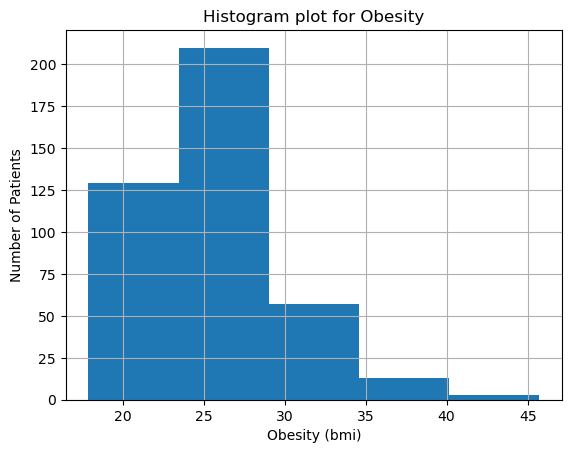

In [117]:
plt.hist(heart_train['obesity'],bins=5)
plt.title('Histogram plot for Obesity')
plt.xlabel('Obesity (bmi)')
plt.ylabel('Number of Patients')
plt.grid()

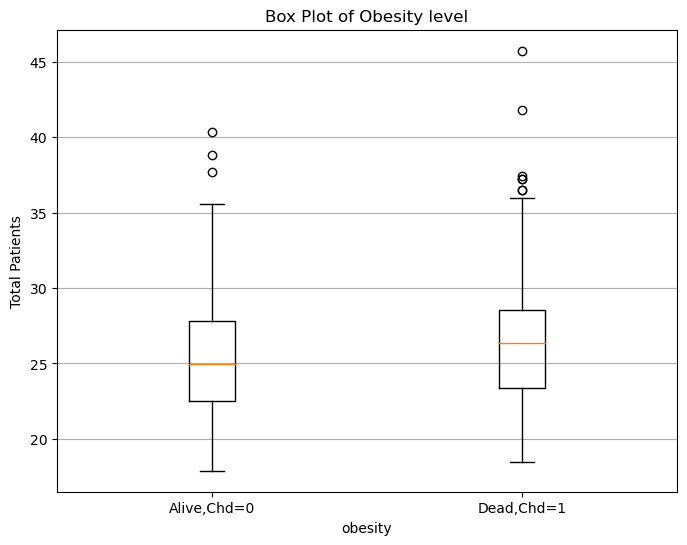

In [118]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of Obesity level')

plt.xlabel('obesity')
plt.ylabel('Total Patients')
plt.grid(axis='y')

box_data=[heart_train['obesity'][(heart_train['chd']==0)],heart_train['obesity'][(heart_train['chd']==1)]]

plt.boxplot(box_data,labels=['Alive,Chd=0', 'Dead,Chd=1'])
plt.show()

**Observation:**
   - From histogram plot it is evident that more number of patients have Obesity in the range 23 bmi to 30 bmi approximately.
   - From the box plot it can be observed that there exists more outliers for chd=0 over chd=1. 
       - The median value for chd=1 is 25 bmi whereas chd=0 is 27 bmi.
       - chd=0 is negatively skewed.


### Box Plots using seaborn library 
### Considering the variables: obesity, adiposity, 'ldl', 'alcohol','tobacco','sbp','typea', 'age'

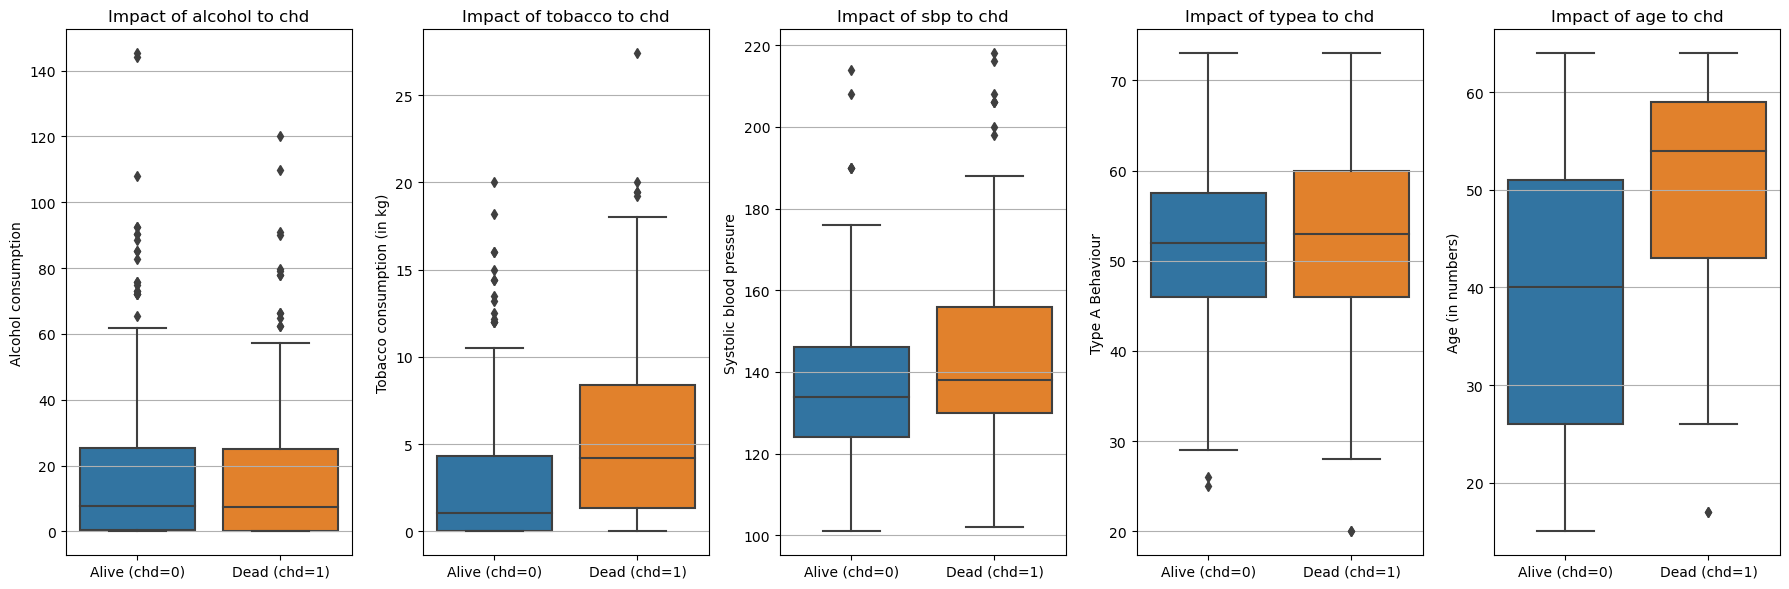

In [119]:

factors = [ 'alcohol','tobacco','sbp','typea', 'age']
focus_index = ['Alcohol consumption', 'Tobacco consumption (in kg)', 'Systolic blood pressure', 'Type A Behaviour', 'Age (in numbers)']

fig, ax = plt.subplots(1, len(factors), figsize=(18, 6))

for i, factor in enumerate(factors):
    data = [heart_train[factor][heart_train['chd'] == 0], heart_train[factor][heart_train['chd'] == 1]]
    
    sns.boxplot(data=data, ax=ax[i])
    
    ax[i].set_title(f'Impact of {factor} to chd')
    ax[i].set_ylabel(focus_index[i])
    ax[i].set_xticklabels(['Alive (chd=0)', 'Dead (chd=1)'])
    ax[i].grid(axis='y')

plt.tight_layout()
ax = ax.flatten()
plt.show()


**Observation:**

**alcohol**
 - Median chd =0 and chd=1 are almost the same.
 - The 25 percentile of Alcohol content in patients is equal to the minimum alcohol content (starting from 0).
 - Alcohol content alone is not the only factor leading to chd=1.
 

**tobacco:**
 - Median for chd =1 > chd=0 case.
 - For chd=1 there are significant count of patients consuming 0 tobacco.
 - More outliers observed for chd=0 vs chd=1.
 
**sbp (Systolic Blood Pressure):**
 - The maximum level of sbp in chd=1 is greater than the maximum level of sbp in chd=0.
 - chd=1 is positively skewed.
 - sbp levels greater than 138 mmHg could be the warning sign leading to chd=1.
 
**typea (Type A):**
- The chd =0 and chd=1 are normally distributed and could observe outliers below the minimum value for both chd cases.

**age:**
- chd=1 is negatively skewed with outlier less than minimum value with median age 55 approximately.
- chd=0 is almost normally distributed with median age = 40
- It can be observed for chd=1 most of the patients lie within the age 45 to 55 but at the same time the reason is just not limited to age as there could be other contributing factors.

#### Exploring famhist  data 

- Plotting countplot using seaborn library to observe famhist.

In [120]:
heart_train.famhist.unique()

array(['Present', 'Absent'], dtype=object)

<Axes: xlabel='famhist', ylabel='count'>

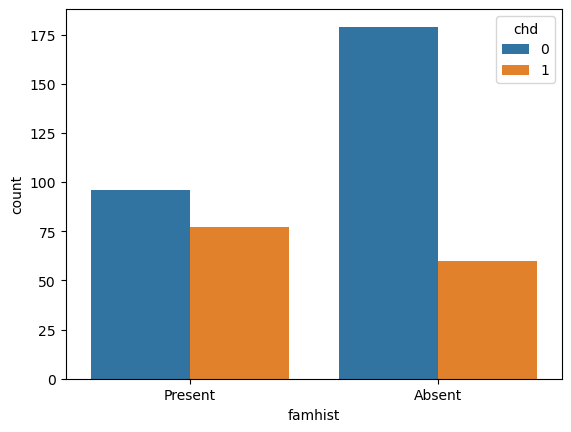

In [121]:

sns.countplot(x="famhist", hue="chd", data=heart_train)

#### Exploring Adiposity  data 

- Plotting histogram to observe adiposity.
- Box plot to represent the adiposity vs chd values.

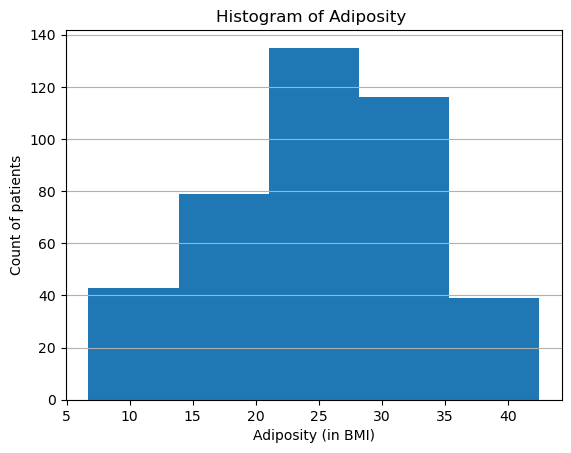

In [122]:
plt.hist(heart_train['adiposity'], bins = 5)
plt.title('Histogram of Adiposity ')
plt.xlabel('Adiposity (in BMI)')
plt.ylabel('Count of patients')
plt.grid(axis='y')

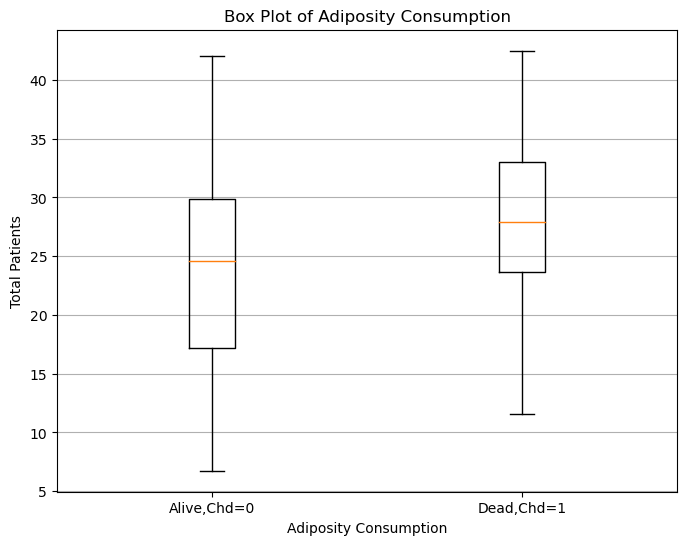

In [123]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of Adiposity Consumption')

plt.xlabel('Adiposity Consumption')
plt.ylabel('Total Patients')
plt.grid(axis='y')

box_data=[heart_train['adiposity'][(heart_train['chd']==0)],heart_train['adiposity'][(heart_train['chd']==1)]]

plt.boxplot(box_data,labels=['Alive,Chd=0', 'Dead,Chd=1'])
plt.show()

### Following variables/parameters could be having the predicting power to derive chd=1 (Dead) 


   - Adiposity
   - Obesity
   - LDL
   - Tobacco
   - Alcohol
   - FamHist


## Q3 The number of null values for each column

In [124]:
heart_train.isnull().sum()

sbp                 0
tobacco             0
ldl                 0
adiposity           0
famhist             0
typea               0
obesity             0
alcohol             0
age                 0
chd                 0
alcohol_category    0
dtype: int64

**Observation:** 
   - There is no null value in heart_train dataset

## Q4. Know about the patients:

### a. Find the oldest person


In [125]:
## Highest age in the dataset
heart_train.age.max()

64

In [126]:
oldest_ppl=heart_train[heart_train['age']==heart_train.age.max()]

In [127]:
oldest_ppl

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  \
58   158     3.60  2.97      30.11   Absent     63    26.64   108.00   64   
70   152    12.18  4.04      37.83  Present     63    34.57     4.17   64   
110  126     0.00  5.98      29.06  Present     56    25.39    11.52   64   
167  148     8.20  7.75      34.46  Present     46    26.53     6.04   64   
170  128     5.16  4.90      31.35  Present     57    26.42     0.00   64   
206  140     8.60  3.90      32.16  Present     52    28.51    11.11   64   
241  160     0.60  6.94      30.53   Absent     36    25.68     1.42   64   
256  138     2.00  5.11      31.40  Present     49    27.25     2.06   64   
276  128     0.73  3.97      23.52   Absent     54    23.81    19.20   64   
348  140     8.60  3.90      32.16  Present     52    28.51    11.11   64   
374  160     0.60  6.94      30.53   Absent     36    25.68     1.42   64   
402  174     2.02  6.57      31.90  Present     50    28.75    11.83   64   

     chd alcohol_category  
58     0          Extreme  
70     0         Very Low  
110    1              Low  
167    1              Low  
170    0         Very Low  
206    1              Low  
241    0         Very Low  
256    1         Very Low  
276    0           Medium  
348    1              Low  
374    0         Very Low  
402    1              Low

In [128]:
oldest_ppl.shape

(12, 11)

In [129]:
## Highest age in this dataset is 64 and 12 people in the heart train dataset are of age 64.

### b. Find the youngest person 

In [130]:
## Lowest age in the dataset
heart_train.age.min()

15

In [131]:
youngest_ppl=heart_train[heart_train['age']==heart_train.age.min()]

In [132]:
youngest_ppl

sbp  tobacco   ldl  adiposity famhist  typea  obesity  alcohol  age  chd  \
9   132      0.0  1.87      17.21  Absent     49    23.63     0.97   15    0   
38  118      0.0  3.67      12.13  Absent     51    19.15     0.60   15    0   

   alcohol_category  
9          Very Low  
38         Very Low

In [133]:
youngest_ppl.shape

(2, 11)

In [134]:
## Lowest age in this dataset is 15 and 2 people in the heart train dataset are of age 2.

### c. Find the average age group

In [135]:
## Average age in the dataset
heart_train.age.mean()

42.68689320388349

In [136]:
avg_age_ppl=heart_train[heart_train['age']==round(heart_train.age.mean(),0)]

In [137]:
avg_age_ppl

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  \
82   136     3.46  6.38      32.25  Present     43    28.73     3.13   43   
90   144     6.75  5.45      29.81   Absent     53    25.62    26.23   43   
139  120     5.50  3.51      23.23   Absent     46    22.40    90.31   43   
177  130     0.08  5.59      25.42  Present     50    24.98     6.27   43   
192  162     6.94  4.55      33.36  Present     52    27.09    32.06   43   
238  154     4.20  5.59      25.02   Absent     58    25.02     1.54   43   
310  120     5.50  3.51      23.23   Absent     46    22.40    90.31   43   
360  162     6.94  4.55      33.36  Present     52    27.09    32.06   43   
399  154     4.20  5.59      25.02   Absent     58    25.02     1.54   43   
403  124     4.25  8.22      30.77   Absent     56    25.80     0.00   43   

     chd alcohol_category  
82     1         Very Low  
90     1             High  
139    0        Very High  
177    1              Low  
192    0             High  
238    0         Very Low  
310    0        Very High  
360    0             High  
399    0         Very Low  
403    0         Very Low

In [138]:
avg_age_ppl.shape

(10, 11)

In [139]:
## Average age in this dataset is 42.6868 which is rounded off to 43 and 10 people in the heart train dataset are of age 43.

### d. Find the median age

In [140]:
## Median age in the dataset
heart_train.age.median()

45.0

In [141]:
median_ppl=heart_train[heart_train['age']==heart_train.age.median()]

So we will find the all the people with median age group

In [142]:
median_ppl

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  \
1    132     6.20  6.47      36.21  Present     62    30.77    14.14   45   
16   136     2.52  3.95      25.63   Absent     51    21.86     0.00   45   
41   114     3.00  7.04      22.64  Present     55    22.59     0.00   45   
46   130     0.56  3.30      30.86   Absent     49    27.52    33.33   45   
136  176     0.00  3.14      31.04  Present     45    30.18     4.63   45   
172  126     0.00  5.29      27.64   Absent     25    27.62     2.06   45   
188  126     3.10  2.01      32.97  Present     56    28.63    26.74   45   
211  138     0.00  3.96      24.70  Present     53    23.80     0.00   45   
217  150    14.40  5.04      26.52  Present     60    28.84     0.00   45   
234  136     6.80  7.84      30.74  Present     58    26.20    23.66   45   
268  140     5.20  3.58      29.26   Absent     70    27.29    20.17   45   
289  180     0.52  4.23      16.38   Absent     55    22.56    14.77   45   
296  136     7.50  7.39      28.04  Present     50    25.01     0.00   45   
307  176     0.00  3.14      31.04  Present     45    30.18     4.63   45   
331  150    14.40  5.04      26.52  Present     60    28.84     0.00   45   
356  126     3.10  2.01      32.97  Present     56    28.63    26.74   45   
395  136     6.80  7.84      30.74  Present     58    26.20    23.66   45   

     chd alcohol_category  
1      0           Medium  
16     1         Very Low  
41     1         Very Low  
46     0             High  
136    0         Very Low  
172    0         Very Low  
188    0             High  
211    0         Very Low  
217    0         Very Low  
234    1           Medium  
268    1           Medium  
289    1           Medium  
296    1         Very Low  
307    0         Very Low  
331    0         Very Low  
356    0             High  
395    1           Medium

In [143]:
median_ppl.shape

(17, 11)

In [144]:
## Median age in this dataset is 45 and 17 people in the heart train dataset are of age 45.

### e. Find the relationship between the deaths and ages(the class column is your prediction variable)


We are creating subset dataframe with age and chd attribute in order explore relation between them

In [145]:
heart_tr_age_chd=heart_train[['age','chd']]

We are plotting histogram for chd= 0 and chd=1 to observe survival distribution throughout different age group.

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

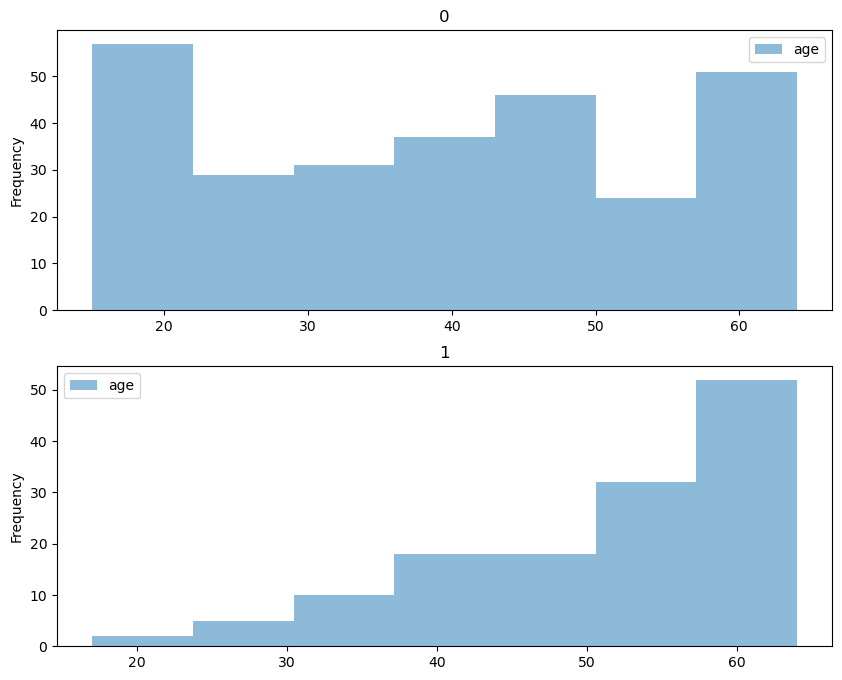

In [146]:
heart_tr_age_chd.plot.hist(column = 'age',by='chd',bins=7, alpha=0.5, figsize=(10, 8))

Since people from different age group are showing different survival rate , we will be grouping the age into 5 different age-groups and check the survival 

In [147]:
# Classifying age attributeinto five different classes

conditions = [
    (heart_train['age'] <= 25),
    (heart_train['age'] <= 35),
    (heart_train['age'] <= 45),
    (heart_train['age'] <= 55),
    (heart_train['age'] > 55),
]
categories = ['Under 25', '26-35', '36-45','46-55', '55+']

heart_train['age_wise_class'] = np.select(conditions, categories, default='Unknown')


heart_train.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd  \
0  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1   
1  132     6.20  6.47      36.21  Present     62    30.77    14.14   45    0   
2  142     4.05  3.38      16.20   Absent     59    20.81     2.62   38    0   
3  114     4.08  4.59      14.60  Present     62    23.11     6.72   58    1   
4  114     0.00  3.83      19.40  Present     49    24.86     2.49   29    0   

  alcohol_category age_wise_class  
0             High          46-55  
1           Medium          36-45  
2         Very Low          36-45  
3              Low            55+  
4         Very Low          26-35

Text(0.5, 1.0, 'Age category wise survival rate')

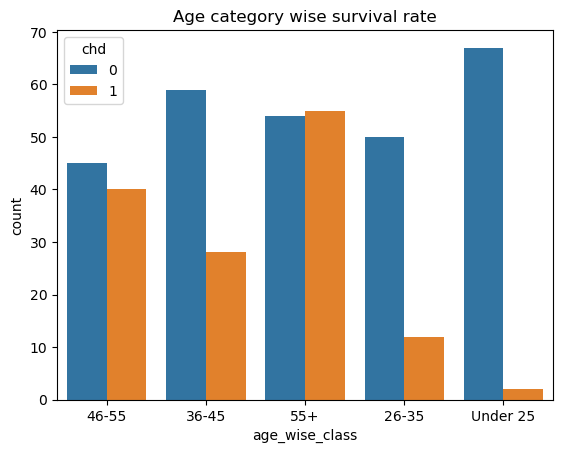

In [148]:
sns.countplot(heart_train,x='age_wise_class',hue='chd')
plt.title('Age category wise survival rate')

# chd= 0 means alive and chd= 1 means dead.

People from age bracket in fifties+ has highest death rate from coronary disease also, under 25 group has highest rate of survival. People in under 25 age group has lowest death rate from coronary disease.

### f. Find the age groups whose survival rate is the largest

So, based on the all the plots, Under 25 age group i.e people with age less than 25 has highest survival rate.

In [149]:
heart_train.groupby(by=['age_wise_class','chd']).age.count()

age_wise_class  chd
26-35           0      50
                1      12
36-45           0      59
                1      28
46-55           0      45
                1      40
55+             0      54
                1      55
Under 25        0      67
                1       2
Name: age, dtype: int64

In Under 25 group total 67 people survived from coronary heart disease and this count is highest among all the groups. 

### g. Find similar relationships for at least 3-4 columns that you think can play a role in prediction

#### 1.We will explore survial rate based on  family history and alcohol consumption

In [150]:
# We will take subset of dataframe having family history,alcohol consumption attribute along with survival rate variable.

In [151]:
heart_tr_fam_alc_chd=heart_train[['famhist','alcohol','chd']]
heart_tr_fam_alc_chd.head()

famhist  alcohol  chd
0  Present    57.34    1
1  Present    14.14    0
2   Absent     2.62    0
3  Present     6.72    1
4  Present     2.49    0

array([<Axes: title={'center': '(0, Absent)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(0, Present)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(1, Absent)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(1, Present)'}, ylabel='Frequency'>],
      dtype=object)

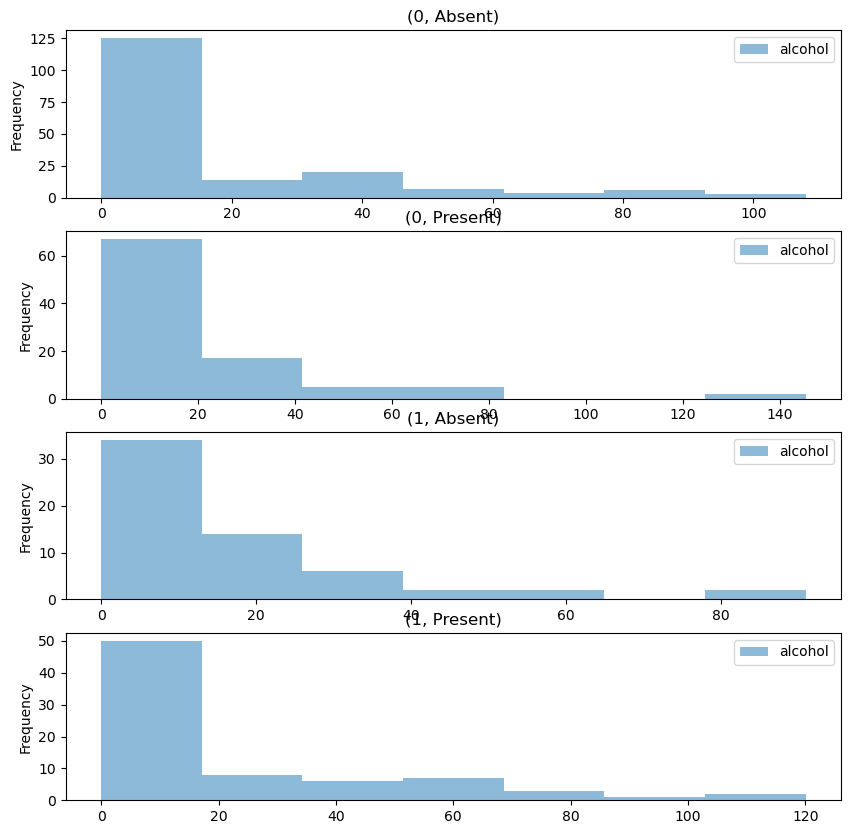

In [152]:
#plt.title('Family history wise,impact of alcohol consumption on coronary disease survival')
heart_tr_fam_alc_chd.plot.hist(column = 'alcohol',by=['chd','famhist'],bins=7, alpha=0.5, figsize=(10, 10))


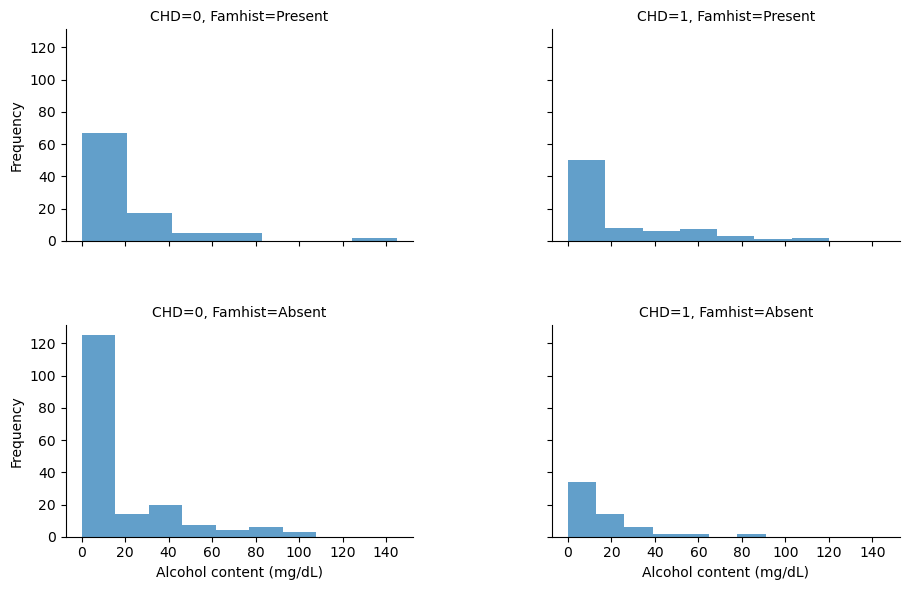

In [153]:
g = sns.FacetGrid(heart_tr_fam_alc_chd, col="chd", row="famhist", aspect=1.5)
g.map(plt.hist, "alcohol", bins=7, alpha=0.7)

g.set_axis_labels("Alcohol content (mg/dL)", "Frequency")
g.set_titles("CHD={col_name}, Famhist={row_name}")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


So , people with familiy history of coronary heart disease has more death rate in same disease than those who do not have such history. Also, people without any family history has highest survial rate.


#### 2.We will explore survial rate based on  tobacco consumption,age

In [154]:
heart_tr_tob_age_chd=heart_train[['tobacco','age','chd','age_wise_class']]
heart_tr_tob_age_chd

tobacco  age  chd age_wise_class
0      13.60   49    1          46-55
1       6.20   45    0          36-45
2       4.05   38    0          36-45
3       4.08   58    1            55+
4       0.00   29    0          26-35
..       ...  ...  ...            ...
407     3.60   42    0          36-45
408     0.00   50    1          46-55
409     3.00   27    0          26-35
410    15.00   41    1          36-45
411     0.21   17    0       Under 25

[412 rows x 4 columns]

In [155]:
heart_tr_tob_age_chd.groupby(by=['age_wise_class','chd']).tobacco.sum()

age_wise_class  chd
26-35           0       77.97
                1       22.83
36-45           0      192.70
                1      122.18
46-55           0      200.28
                1      232.29
55+             0      267.75
                1      381.44
Under 25        0       13.06
                1        0.00
Name: tobacco, dtype: float64

This data shows people in their 50+ age, have highest tobacco consumption along with highest death rate in coronary disease.

<Axes: title={'center': 'Age wise tobacco consumption and coronary disease survival'}, xlabel='age', ylabel='tobacco'>

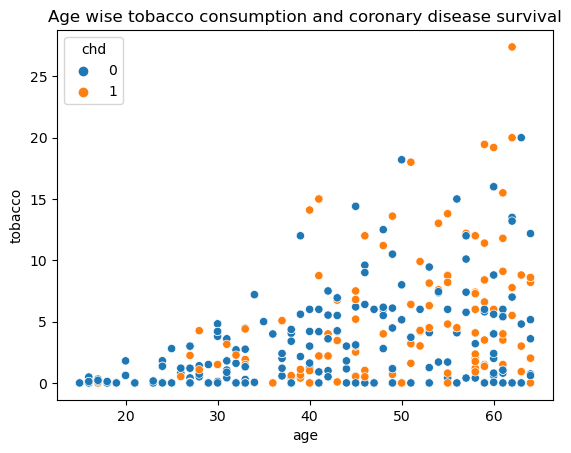

In [156]:
plt.title('Age wise tobacco consumption and coronary disease survival')
sns.scatterplot(data=heart_tr_tob_age_chd, x="age",y="tobacco",hue="chd")


The scatter plot is showing people has tendencies to consume more tobacco as they grow old and people over 50s have highest tobacco consumption rate.This might lead them to coronary disease more and the death rate in this disease is highesr in older people.So , tobacco consumption could be a factor predicting survival rate at coronary disease.

#### 3.We will explore survial rate based on adiposity,age

In [157]:
heart_tr_adipos_age_chd=heart_train[['adiposity','age','chd','age_wise_class']]
heart_tr_adipos_age_chd

adiposity  age  chd age_wise_class
0        27.78   49    1          46-55
1        36.21   45    0          36-45
2        16.20   38    0          36-45
3        14.60   58    1            55+
4        19.40   29    0          26-35
..         ...  ...  ...            ...
407      22.67   42    0          36-45
408      33.23   50    1          46-55
409      17.91   27    0          26-35
410      36.94   41    1          36-45
411      15.11   17    0       Under 25

[412 rows x 4 columns]

In [158]:
heart_tr_adipos_age_chd.groupby(by=['age_wise_class','chd']).adiposity.median()

age_wise_class  chd
26-35           0      22.095
                1      25.650
36-45           0      25.730
                1      27.715
46-55           0      30.120
                1      30.120
55+             0      29.685
                1      28.340
Under 25        0      15.890
                1      12.130
Name: adiposity, dtype: float64

This data suggests that the people in their forties have issues with adiposity or excess fat deposit most. But this does affect coronary disease survival rate.Even for people in under 25 category(age lesser than 25), who have low adiposity do not show any significant difference in coronary disease survival rate.

<Axes: title={'center': 'Age wise adiposity and coronary disease survival'}, xlabel='age', ylabel='adiposity'>

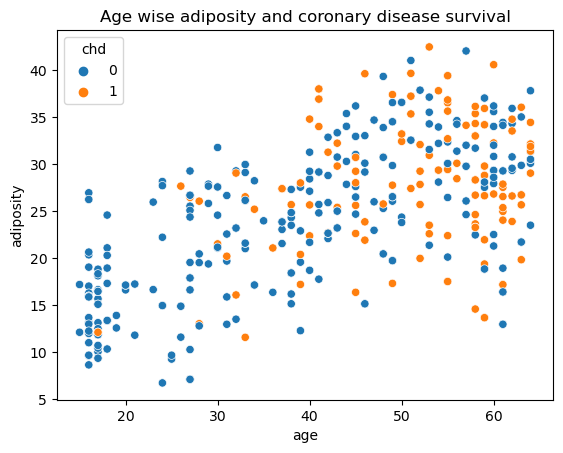

In [159]:
plt.title('Age wise adiposity and coronary disease survival')
sns.scatterplot(data=heart_tr_adipos_age_chd, x="age",y="adiposity",hue="chd")


The scatter plot suggests that adiposity does not impact survival rate much

#### 4.Grouped people based on Alcohol consumption

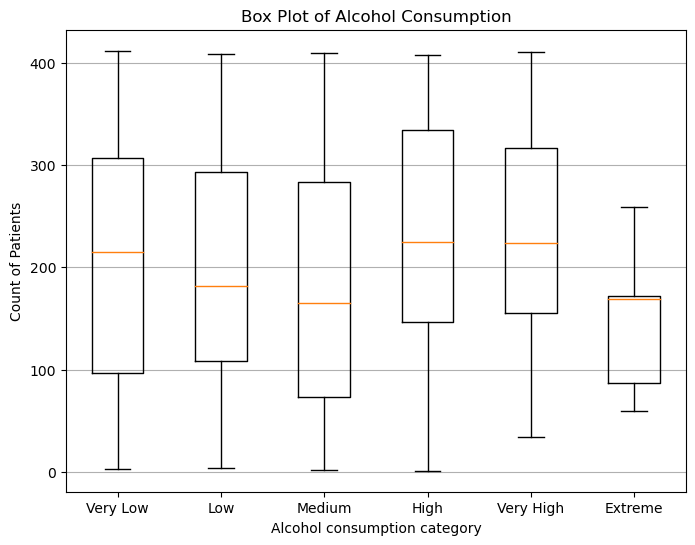

In [160]:
heart_train['id'] = heart_train.reset_index().index + 1
plt.figure(figsize=(8, 6))
plt.title('Box Plot of Alcohol Consumption')

plt.xlabel('Alcohol consumption category')
plt.ylabel('Count of Patients')
plt.grid(axis='y')



box_data=[heart_train['id'][(heart_train['alcohol_category']=="Very Low")],heart_train['id'][(heart_train['alcohol_category']=="Low")],heart_train['id'][(heart_train['alcohol_category']=="Medium")],heart_train['id'][(heart_train['alcohol_category']=="High")],heart_train['id'][(heart_train['alcohol_category']=="Very High")],heart_train['id'][(heart_train['alcohol_category']=="Extreme")]]

plt.boxplot(box_data,labels=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme'])
plt.show()

In [161]:
grouped_people = heart_train['id'].groupby(heart_train['alcohol_category']).count()
grouped_people

alcohol_category
Extreme        5
High          68
Low           65
Medium        55
Very High     29
Very Low     190
Name: id, dtype: int64

**Note:** 

- Below code will drop the colum id from the heart_train dataset as the analysis is executed in theprevious step.

In [162]:
heart_train.drop(columns = ['id'], inplace =True) 

### Q4.h. Get more visuals on data distributions
##### Q4.h.i. Use plotCorrelationMatrix

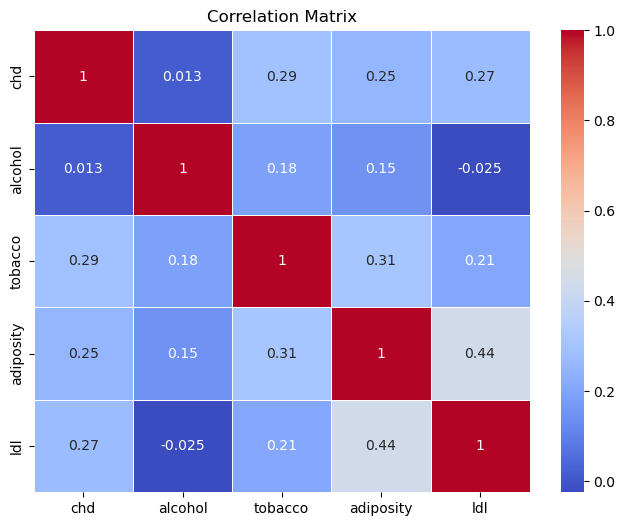

In [163]:
corr_matrix = heart_train[['chd','alcohol', 'tobacco', 'adiposity','ldl']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

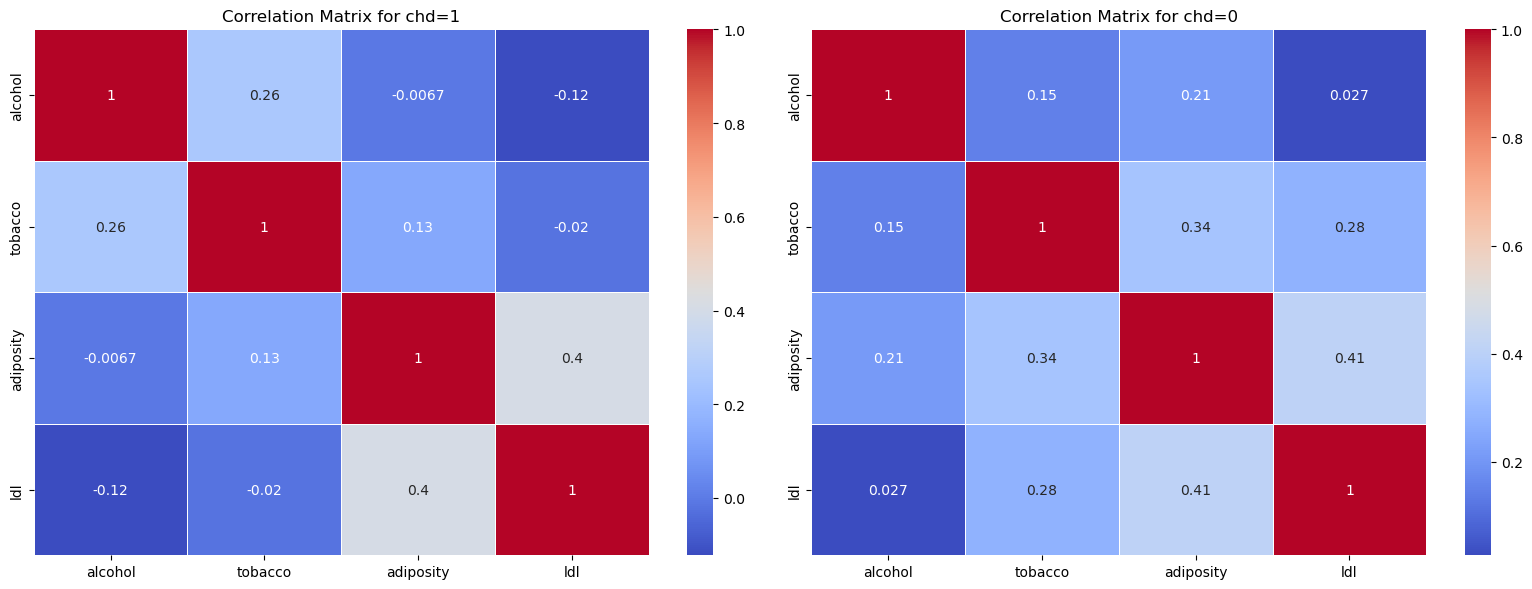

In [164]:

corr_matrix_chd_1 = heart_train[heart_train['chd'] == 1][[ 'alcohol', 'tobacco', 'adiposity', 'ldl']].corr()
corr_matrix_chd_0 = heart_train[heart_train['chd'] == 0][['alcohol', 'tobacco', 'adiposity', 'ldl']].corr()


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix_chd_1, annot=True, cmap='coolwarm', linewidths=0.5, xticklabels=True, yticklabels=True, ax=ax[0])
ax[0].set_title('Correlation Matrix for chd=1')

sns.heatmap(corr_matrix_chd_0, annot=True, cmap='coolwarm', linewidths=0.5, xticklabels=True, yticklabels=True, ax=ax[1])
ax[1].set_title('Correlation Matrix for chd=0')

plt.tight_layout()
plt.show()


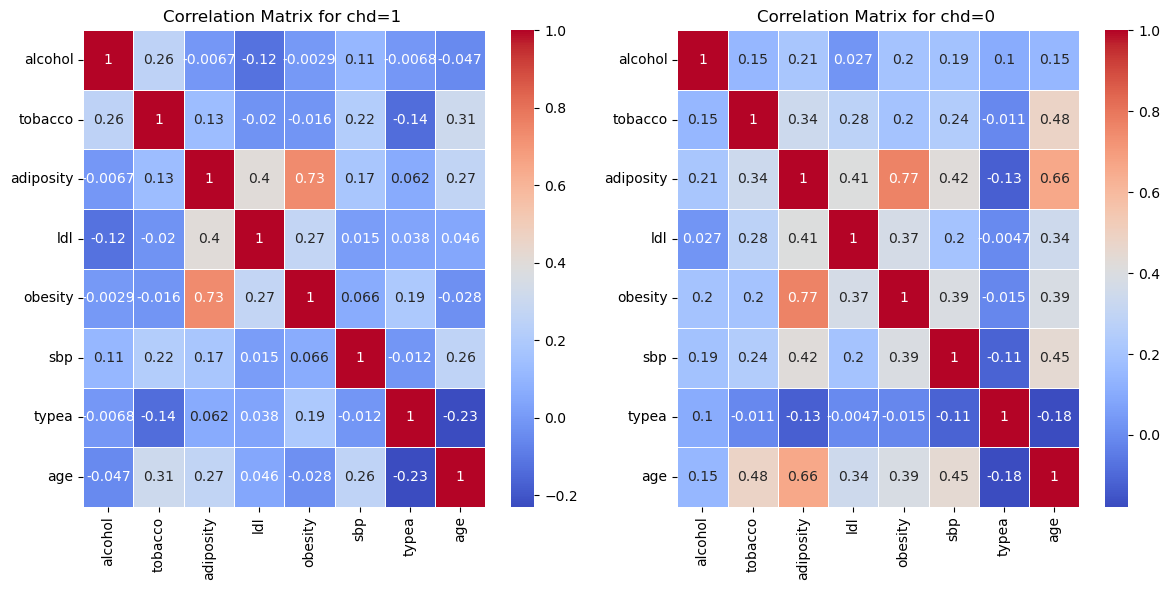

In [165]:
conditions = [
    {'chd': 1,  'title': 'chd=1 '},
    {'chd': 0,  'title': 'chd=0 '}
]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, condition in enumerate(conditions):
    corr_matrix = heart_train[
        (heart_train['chd'] == condition['chd']) 
    ][['alcohol', 'tobacco', 'adiposity', 'ldl', 'obesity', 'sbp', 'typea', 'age']].corr()

    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        linewidths=0.5,
        xticklabels=True,
        yticklabels=True,
        ax=ax[i]
    )
    
    ax[i].set_title(f'Correlation Matrix for {condition["title"]}')

plt.tight_layout()

plt.show()



#### Observation:

**For chd=1 category:**

- Adiposity and Obesity are the parameters that indicates a positive linear correlation.
- Adiposity and ldl are the parameters that indicates no linear correlation.
- Typea and age are the parameters that indicates a negative linear correlation.

**For chd=0 category:**

- Here as well, Adiposity and Obesity are the parameters that indicates a positive linear correlation.
- sbp and obesity are the parameters that indicates no linear correlation.
- Again, Typea and age are the parameters that indicates a negative linear correlation.

    

##### Q4.h.ii.plotScatterMatrix

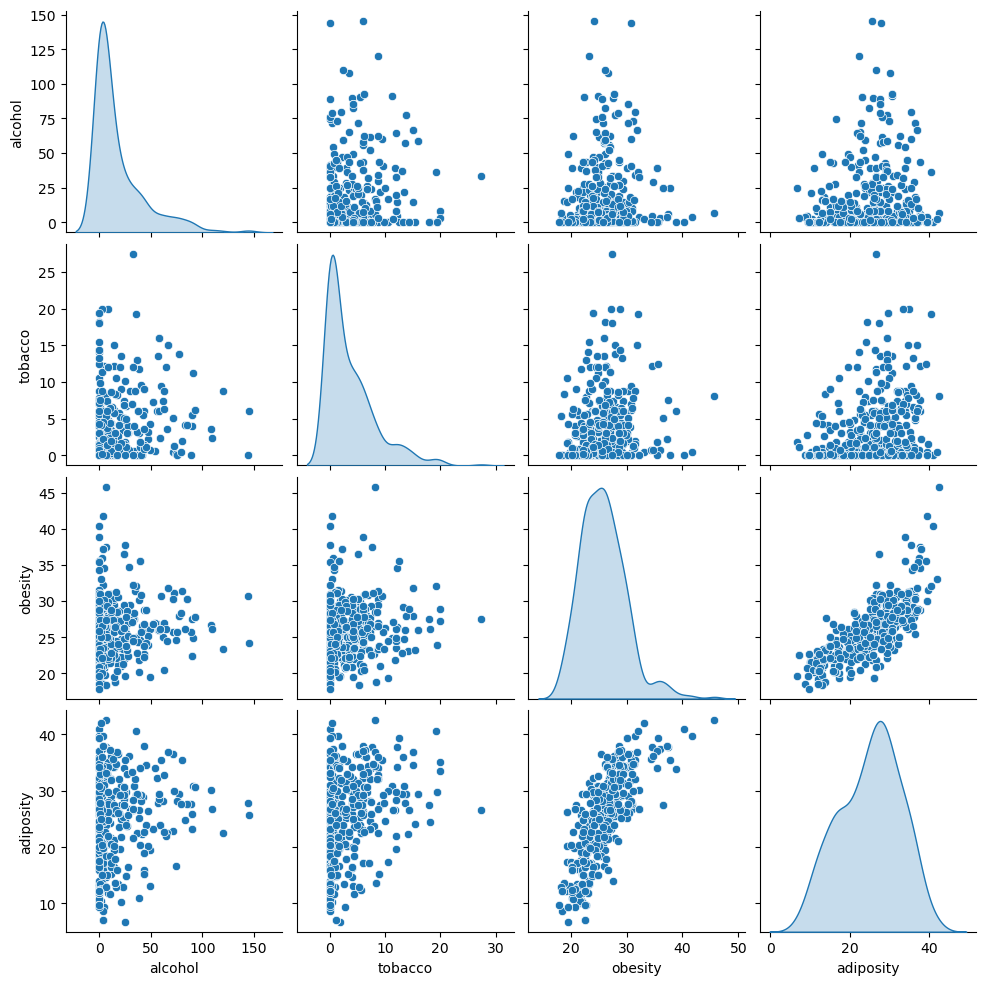

In [166]:

variables = ['alcohol', 'tobacco', 'obesity', 'adiposity']

scatter_data = heart_train[variables]
sns.pairplot(scatter_data, diag_kind='kde')  

plt.show()


##### Q4.h.iii. plotPerColumnDistribution

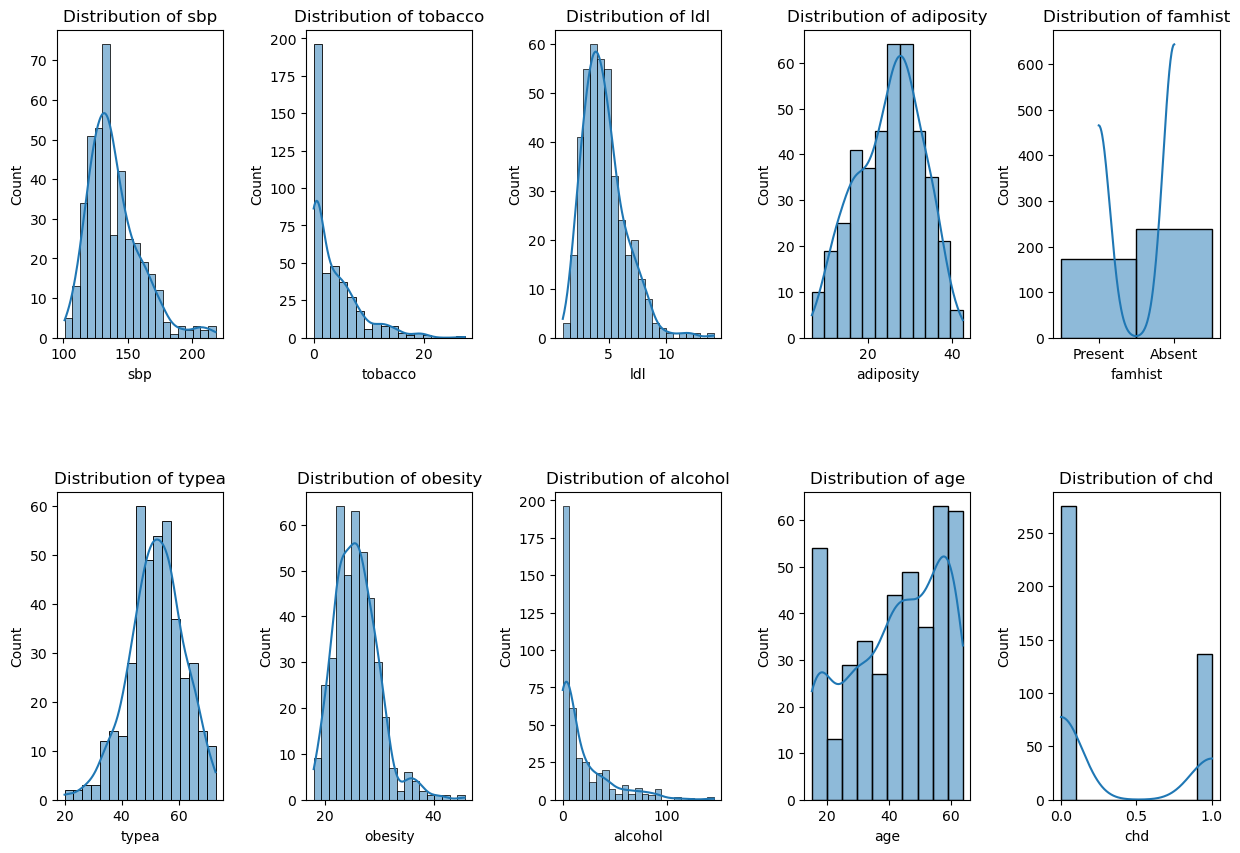

In [167]:
def plotPerColumnDistribution(dataframe, num_cols_per_row=5, figsize=(15, 10), num_columns=10):
    columns_to_plot = dataframe.columns[:num_columns]
    num_cols = len(columns_to_plot)
    num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row
    
    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, column in enumerate(columns_to_plot):
        row_idx = i // num_cols_per_row
        col_idx = i % num_cols_per_row
        
        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]
        
        sns.histplot(dataframe[column], ax=ax, kde=True)
        ax.set_title(f'Distribution of {column}')
        
    for i in range(num_cols, num_cols_per_row * num_rows):
        fig.delaxes(axes[i])
    
    plt.show()

# Usage example:
plotPerColumnDistribution(heart_train, num_cols_per_row=5, num_columns=10)


### i. Check for the missing values, If they exist 
####          i. Find missing values
####          ii. Get the count of missing values 
####          iii. Plot a heat map for missing values

In [168]:
# Checking null values in each columns
heart_train.isnull().sum()

sbp                 0
tobacco             0
ldl                 0
adiposity           0
famhist             0
typea               0
obesity             0
alcohol             0
age                 0
chd                 0
alcohol_category    0
age_wise_class      0
dtype: int64

So there is no null value in initial train dataset.

In [169]:
#Checking zero values in each column except chd 

sbp_zero_cnt= (heart_train['sbp'] == 0).sum()
print('sbp_zero_cnt :',sbp_zero_cnt)
tobacco_zero_cnt = (heart_train['tobacco'] == 0).sum()
print('tobacco_zero_cnt :',tobacco_zero_cnt)
ldl_zero_cnt= (heart_train['ldl'] == 0).sum()
print('ldl_zero_cnt :',ldl_zero_cnt)
adiposity_zero_cnt = (heart_train['adiposity'] == 0).sum()
print('adiposity_zero_cnt :',adiposity_zero_cnt)
famhist_zero_cnt = (heart_train['famhist'] == 0).sum()
print('famhist_zero_cnt :',famhist_zero_cnt)
typea_zero_cnt = (heart_train['typea'] == 0).sum()
print('typea_zero_cnt :',typea_zero_cnt)
obesity_zero_cnt = (heart_train['obesity'] == 0).sum()
print('obesity_zero_cnt :',obesity_zero_cnt)
alcohol_zero_cnt = (heart_train['alcohol'] == 0).sum()
print('alcohol_zero_cnt :',alcohol_zero_cnt)
age_zero_cnt = (heart_train['age'] == 0).sum()
print('age_zero_cnt :',age_zero_cnt)

sbp_zero_cnt : 0
tobacco_zero_cnt : 101
ldl_zero_cnt : 0
adiposity_zero_cnt : 0
famhist_zero_cnt : 0
typea_zero_cnt : 0
obesity_zero_cnt : 0
alcohol_zero_cnt : 101
age_zero_cnt : 0


Tobacco and alcohol attributes are having 101 zero values.Lets replace these zero values with null values.

In [170]:
heart_train['tobacco'] = heart_train['tobacco'].replace(0,np.nan)
heart_train['alcohol'] = heart_train['alcohol'].replace(0,np.nan)

In [171]:
# Checking null values in each columns
heart_train.isnull().sum()

sbp                   0
tobacco             101
ldl                   0
adiposity             0
famhist               0
typea                 0
obesity               0
alcohol             101
age                   0
chd                   0
alcohol_category      0
age_wise_class        0
dtype: int64

So after replacing zeros with nulls, tobacco and alcohol features are showing 101 null values.

In [172]:
heart_train.dtypes

sbp                   int64
tobacco             float64
ldl                 float64
adiposity           float64
famhist              object
typea                 int64
obesity             float64
alcohol             float64
age                   int64
chd                   int64
alcohol_category     object
age_wise_class       object
dtype: object

#we will store dataset with all missing values in tobacco and alcohol fields only into another dataframe so that we can plot a heatmap for it


In [173]:
missing_val=heart_train[(heart_train['tobacco'].isnull()==True)&(heart_train['alcohol'].isnull()==True)]
missing_val.drop(columns=['famhist','age_wise_class', 'alcohol_category'],inplace=True)

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_4312\1230017852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_val.drop(columns=['famhist','age_wise_class', 'alcohol_category'],inplace=True)


In [174]:
missing_val

sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  chd
5    132      NaN  5.80      30.96     69    30.11      NaN   53    1
8    118      NaN  1.88      10.05     59    21.57      NaN   17    0
37   122      NaN  3.37      16.10     67    21.06      NaN   32    1
45   128      NaN  2.43      13.15     63    20.75      NaN   17    0
62   124      NaN  3.04      17.33     49    22.04      NaN   18    0
89   122      NaN  3.05      23.51     46    25.81      NaN   38    0
93   138      NaN  2.68      17.04     42    22.16      NaN   16    0
94   148      NaN  3.84      17.26     70    20.00      NaN   21    0
95   122      NaN  3.08      16.30     43    22.13      NaN   16    0
101  120      NaN  2.42      16.66     46    20.16      NaN   17    0
105  152      NaN  6.06      41.05     51    40.34      NaN   51    0
117  120      NaN  3.98      13.19     47    21.89      NaN   16    0
123  130      NaN  1.88      12.51     52    20.28      NaN   17    0
140  174      NaN  3.86      21.73     42    23.37      NaN   63    0
148  120      NaN  3.57      23.22     58    27.20      NaN   32    0
149  118      NaN  3.89      15.96     65    20.18      NaN   16    0
150  108      NaN  1.43      26.26     42    19.38      NaN   16    0
208  136      NaN  2.28      18.14     55    22.59      NaN   17    0
211  138      NaN  3.96      24.70     53    23.80      NaN   45    0
213  170      NaN  3.12      37.15     47    35.42      NaN   53    0
214  128      NaN  8.41      28.82     60    26.86      NaN   59    1
225  134      NaN  3.69      13.92     43    27.66      NaN   19    0
235  130      NaN  4.16      39.43     46    30.01      NaN   55    1
244  128      NaN  6.34      11.87     57    23.14      NaN   17    0
261  122      NaN  3.76      24.59     56    24.36      NaN   30    0
267  124      NaN  3.23       9.64     59    22.70      NaN   16    0
286  132      NaN  0.98      21.39     62    26.75      NaN   53    0
291  114      NaN  4.97       9.69     26    22.60      NaN   25    0
293  138      NaN  3.14      12.00     54    20.28      NaN   16    0
299  120      NaN  3.10      26.97     41    24.80      NaN   16    0
311  174      NaN  3.86      21.73     42    23.37      NaN   63    0
319  120      NaN  3.57      23.22     58    27.20      NaN   32    0
320  118      NaN  3.89      15.96     65    20.18      NaN   16    0
321  108      NaN  1.43      26.26     42    19.38      NaN   16    0
328  128      NaN  8.41      28.82     60    26.86      NaN   59    1
350  156      NaN  3.47      21.10     73    28.40      NaN   36    1
377  128      NaN  6.34      11.87     57    23.14      NaN   17    0
396  130      NaN  4.16      39.43     46    30.01      NaN   55    1
404  114      NaN  2.63       9.69     45    17.89      NaN   16    0

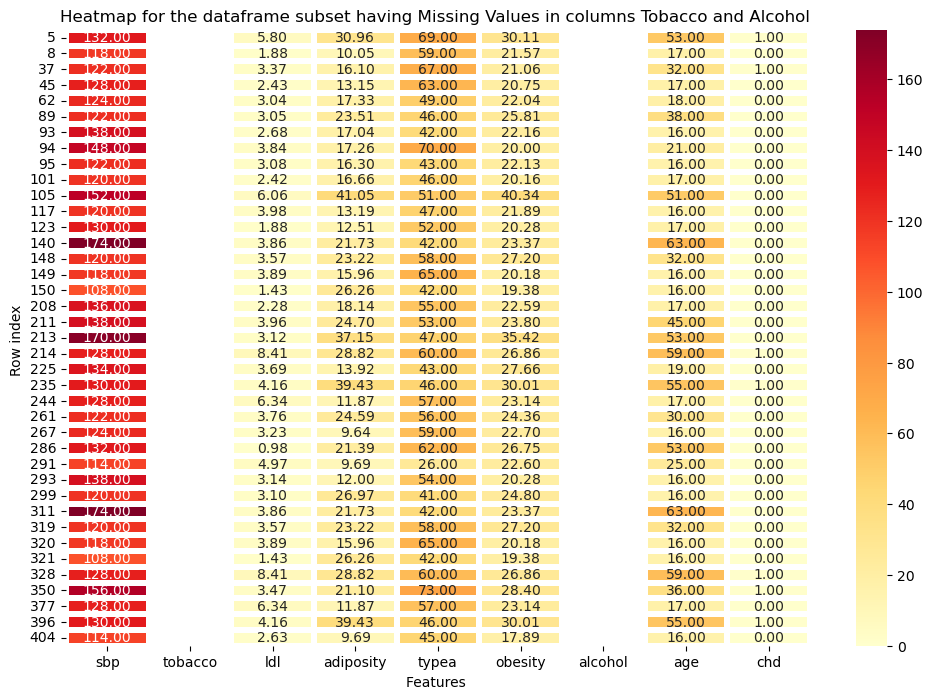

In [175]:

plt.figure(figsize=(12, 8))

sns.heatmap(missing_val, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=3)
plt.title("Heatmap for the dataframe subset having Missing Values in columns Tobacco and Alcohol ")
plt.xlabel("Features ")
plt.ylabel("Row index ")


plt.show()



Dropping missing value columns -tobacco and alcohol and taking heatmap of rest of the dataframe. Since those two column values are missing they are giving white space in heatmap.

In [176]:
missing_val.drop(columns=['tobacco','alcohol'],inplace=True)

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_4312\986544149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_val.drop(columns=['tobacco','alcohol'],inplace=True)


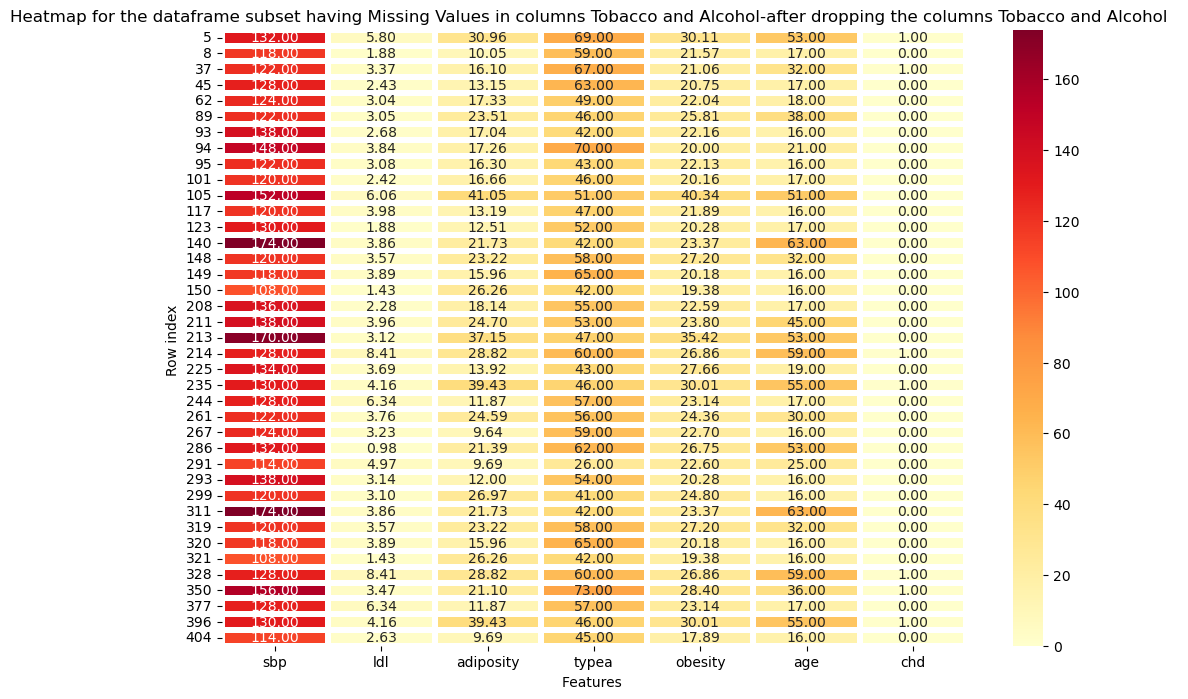

In [177]:
plt.figure(figsize=(12, 8))

sns.heatmap(missing_val, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=3)
plt.title("Heatmap for the dataframe subset having Missing Values in columns Tobacco and Alcohol-after dropping the columns Tobacco and Alcohol  ")
plt.xlabel("Features ")
plt.ylabel("Row index ")


plt.show()

## j.Check for missing values and What additional techniques to handle null values, excluding the drop na feature?

Now we will check our original dataset heart_train for all the missing values again and check the percentage of missing values in tobacco and alcohol field

In [178]:
#sum of missing values in each column
heart_train.isnull().sum()

sbp                   0
tobacco             101
ldl                   0
adiposity             0
famhist               0
typea                 0
obesity               0
alcohol             101
age                   0
chd                   0
alcohol_category      0
age_wise_class        0
dtype: int64

In [179]:
#Computing missing value percentage in each column and storing in another dataframe
percent_missing = heart_train.isnull().sum() * 100 / len(heart_train)
percent_missing_heart_train_df = pd.DataFrame({'column_name': heart_train.columns,
                                 'percent_missing': percent_missing})

In [180]:
#Percentage of missing values in each column
percent_missing_heart_train_df

column_name  percent_missing
sbp                            sbp         0.000000
tobacco                    tobacco        24.514563
ldl                            ldl         0.000000
adiposity                adiposity         0.000000
famhist                    famhist         0.000000
typea                        typea         0.000000
obesity                    obesity         0.000000
alcohol                    alcohol        24.514563
age                            age         0.000000
chd                            chd         0.000000
alcohol_category  alcohol_category         0.000000
age_wise_class      age_wise_class         0.000000

Since tobacco and alcohol both fields are having 24.5% of missing values, instead of dropping those features altogether, we will impute them.
Also, both of them are numeric fields, so we will impute them with median values.

In [181]:
heart_train['tobacco'].fillna(value = heart_train.tobacco.median(), inplace = True)
heart_train['alcohol'].fillna(value = heart_train.alcohol.median(), inplace = True)

In [182]:
#After imputation, let us check again the sum of missing values in dataset
heart_train.isnull().sum()

sbp                 0
tobacco             0
ldl                 0
adiposity           0
famhist             0
typea               0
obesity             0
alcohol             0
age                 0
chd                 0
alcohol_category    0
age_wise_class      0
dtype: int64

So, all the null values in tobacco and alcohol features got imputed

## k. Applying the feature scaling technique if you think it is required. 

We apply feature scaling technique whenever all the feature which play role in predictinbg the dependent variable, are not in similar range, e.g. some of the attributes has values in thousands where as other attribute values are in tens.

[Ref , https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35#:~:text=Feature%20scaling%20in%20machine%20learning,scaling%20are%20Normalization%20and%20Standardization.]

In the given heart train dataset, all the features are having values in either in tens or in hundreds. To build logistic regression model, we will perform MinMaxScaler() trannsformation here as our target variable chd is in 0-1 range,we needed to perform data normalization.


[Ref : https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/#:~:text=The%20two%20most%20popular%20techniques,we%20have%20the%20most%20precision.]

## l. Applying the regression models that is given below.
## Use the following Logistic regression to handle the classification problems


In [183]:
#Import Libraries for Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [184]:
heart_train.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd  \
0  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1   
1  132     6.20  6.47      36.21  Present     62    30.77    14.14   45    0   
2  142     4.05  3.38      16.20   Absent     59    20.81     2.62   38    0   
3  114     4.08  4.59      14.60  Present     62    23.11     6.72   58    1   
4  114     4.00  3.83      19.40  Present     49    24.86     2.49   29    0   

  alcohol_category age_wise_class  
0             High          46-55  
1           Medium          36-45  
2         Very Low          36-45  
3              Low            55+  
4         Very Low          26-35

In [185]:
# We will drop age_wise_class attribute as it was derived attribute for data analysis
heart_train.drop(columns=(['age_wise_class','alcohol_category']),inplace=True)
# heart_train.drop(columns=['alcohol_category'], inplace=True)


famhist feature has categorical values and to do logistic regression, we need to change it into numerical. So we need dummy values against famhist attribute.

In [186]:
heart_train_with_dummy = pd.get_dummies(heart_train, columns=['famhist'])
heart_train_with_dummy.head()

sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  chd  \
0  134    13.60  3.50      27.78     60    25.99    57.34   49    1   
1  132     6.20  6.47      36.21     62    30.77    14.14   45    0   
2  142     4.05  3.38      16.20     59    20.81     2.62   38    0   
3  114     4.08  4.59      14.60     62    23.11     6.72   58    1   
4  114     4.00  3.83      19.40     49    24.86     2.49   29    0   

   famhist_Absent  famhist_Present  
0               0                1  
1               0                1  
2               1                0  
3               0                1  
4               0                1

Now to train the test dataset , we will split our train datset into feature(X_feature) and target(y_target) variable datasets. Here our target variable is 'chd' and rest of the attributes are independent variables or features.

In [187]:
X_feature= heart_train_with_dummy[['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age','famhist_Absent','famhist_Present']]
y_target=heart_train_with_dummy[['chd']]

In [188]:
X_feature.head()

sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
0  134    13.60  3.50      27.78     60    25.99    57.34   49   
1  132     6.20  6.47      36.21     62    30.77    14.14   45   
2  142     4.05  3.38      16.20     59    20.81     2.62   38   
3  114     4.08  4.59      14.60     62    23.11     6.72   58   
4  114     4.00  3.83      19.40     49    24.86     2.49   29   

   famhist_Absent  famhist_Present  
0               0                1  
1               0                1  
2               1                0  
3               0                1  
4               0                1

In [189]:
y_target.head()

chd
0    1
1    0
2    0
3    1
4    0

In order to build logistic regression model we need to split our Heart-train dataset into train and test datasets. We will build our model on train part of the dataset and test our model on test part of the dataset bnefore we run our prediction on Heart-test dataset

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X_feature,y_target,test_size=0.3,random_state=0)

In [191]:
#Applying resampling to the train data only
X_resampled,y_resampled=resample(X_train,y_train, random_state=0)

In [192]:
#Applying scaler transformation on test and train features
#scaler = StandardScaler()
scaler =MinMaxScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

In [193]:
#Converting target dataset- y_resampled into 1D-array so that we can pass it to Logistic regression function
y_resampled=y_resampled.values.reshape(-1)

In [194]:
#Instantiating the logistic regression model
#We will fit logistic regression with sampled data
model=LogisticRegression()
model.fit(X_train,y_resampled)

LogisticRegression()

In [195]:
#We will run prediction based on the train model on test data to get predicted target data
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [196]:
from sklearn.metrics import classification_report
# classification report will give us precision,recall,f1 score.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        80
           1       0.59      0.39      0.47        44

    accuracy                           0.69       124
   macro avg       0.65      0.62      0.62       124
weighted avg       0.67      0.69      0.67       124



Our logistic model has 67% accurately classified survival rate in the given sample dataset.

In [197]:
#Logistic Regssion score for Train data
print("Train: ", model.score(X_train,y_resampled)) 


Train:  0.7743055555555556


In [198]:
#Logistic Regssion score for Test data
print("Test: ", model.score(X_test, y_test))

Test:  0.6854838709677419


In [199]:
#Mean Squared error for the Logistic regression model

from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_pred, y_test, squared=True))

MSE:  0.31451612903225806


### Now we will perform prediction on Heart Test dataset using the logistic regression model we created.

#### Loading heart test csv dataset

In [200]:
heart_test= pd.read_csv('heart-test.csv')

Since, heart_test dataset has same categorical attribute -famhist,to run prediction , we need to get dummies for this attribute.

In [201]:
heart_test_with_dummy = pd.get_dummies(heart_test, columns=['famhist'])
heart_test_with_dummy.head()

ID  sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
0   1  114     4.08  4.59      14.60     62    23.11     6.72   58   
1   2  114     0.00  3.83      19.40     49    24.86     2.49   29   
2   3  132     0.00  5.80      30.96     69    30.11     0.00   53   
3   4  206     6.00  2.95      32.27     72    26.81    56.06   60   
4   5  134    14.10  4.44      22.39     65    23.09     0.00   40   

   famhist_Absent  famhist_Present  
0               0                1  
1               0                1  
2               0                1  
3               1                0  
4               0                1

heart_test dataset will be trained and for that ID column is not required

In [202]:
heart_test_with_dummy=heart_test_with_dummy.drop(columns=['ID'])
heart_test_with_dummy.head()

sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
0  114     4.08  4.59      14.60     62    23.11     6.72   58   
1  114     0.00  3.83      19.40     49    24.86     2.49   29   
2  132     0.00  5.80      30.96     69    30.11     0.00   53   
3  206     6.00  2.95      32.27     72    26.81    56.06   60   
4  134    14.10  4.44      22.39     65    23.09     0.00   40   

   famhist_Absent  famhist_Present  
0               0                1  
1               0                1  
2               0                1  
3               1                0  
4               0                1

We will run prediction using Logistic regression model we created earlier.

In [203]:
pred_lreg = model.predict(heart_test_with_dummy.values)

In [204]:
#Final prediction 
pred_lreg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# ---------------------   END of PART 1   --------------------------------------------------------------

# PART -2 : Price Dataset

#### About the data:
Price dataset contains the housing price data for real estate properties.This dataset has 4600 rows and 18 columns.
The columns are as follows:

● 'date'

● 'price'

● 'bedrooms' 

● 'bathrooms'

● 'sqft_living'

● 'sqft_lot'

● 'floors' 

● 'waterfront'

● 'view'

● 'condition' 

● 'sqft_above'

● 'sqft_basement'

● 'yr_built'

● 'yr_renovated'

● 'street'

● 'city'

● 'statezip'

● 'country'
   

#### Importing required libraries

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as ss
from scipy.stats import ttest_ind 
from scipy.stats import ttest_rel  
from scipy.stats import f_oneway
import numpy.linalg as nla
import scipy.linalg as sla

#### Loading the dataset Price

In [222]:
housing_price = pd.read_csv('Price.csv')

In [223]:
# Let us glance the housing price dataset
housing_price.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0         3       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0         5       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0         3       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0         3       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [224]:
housing_price.shape

(4600, 18)

In [225]:
housing_price.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### Q2. Identify the types of variables present and categorize them.

In [226]:
housing_price.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [227]:
housing_price.bedrooms.unique()

array([3, 5, 4, 2, 6, 7, 9, 1, 8, 0], dtype=int64)

In [228]:
housing_price.bathrooms.unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 0.  , 6.75])

In [229]:
housing_price.floors.unique()

array([1.5, 2. , 1. , 2.5, 3. , 3.5])

In [230]:
housing_price.waterfront.unique()

array([0, 1], dtype=int64)

In [231]:
housing_price.view.unique()

array([0, 4, 1, 2, 3], dtype=int64)

In [232]:
housing_price.condition.unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [233]:
housing_price.country.unique()


array(['USA'], dtype=object)

In [234]:
housing_price.street.unique()

array(['18810 Densmore Ave N', '709 W Blaine St',
       '26206-26214 143rd Ave SE', ..., '759 Ilwaco Pl NE',
       '5148 S Creston St', '18717 SE 258th St'], dtype=object)

In [235]:
housing_price.statezip.unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

**Categorical data:**
- country = categorical data (USA)
- street
- statezip

**Continuous data:**
- price = continuous numerical (float)
- sqft_living = continuous numerical (int)
- sqft_lot = continuous numerical (int)
- sqft_above= continuous numerical (int)
- sqft_basement = continuous numerical (int)

**Discrete data:**
- date 
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- yr_built
- yr_renovated



In [236]:
#Checking data types in housing_price dataset
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [237]:
#Changing price data type in int64
housing_price['price'] = housing_price['price'].apply(np.int64)

In [238]:
#checking price data type
housing_price['price'].dtypes

dtype('int64')

In [239]:
housing_price['price'] = housing_price['price'].round(2)

In [240]:
housing_price['price'].tail(20)

4580    282508
4581    473200
4582    406062
4583    282766
4584    486445
4585    486895
4586    430277
4587    229629
4588         0
4589    182805
4590    380680
4591    396166
4592    252980
4593    289373
4594    210614
4595    308166
4596    534333
4597    416904
4598    203400
4599    220600
Name: price, dtype: int64

## Q3. Obtain insights about the data.

#### Exploring Price  data 

- Plotting histogram to observe Price.

Text(0.5, 1.0, 'Histogram plot for house Price')

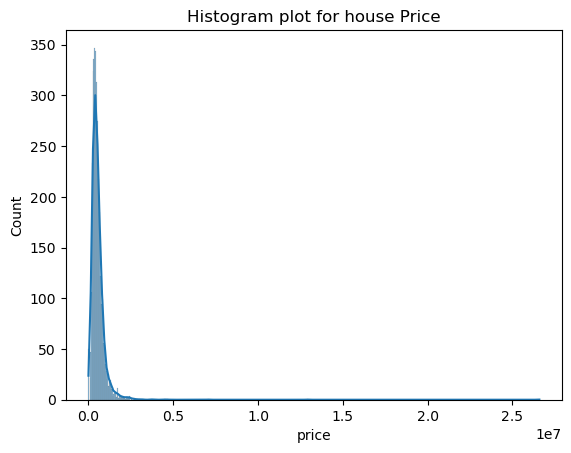

In [241]:
sns.histplot(data=housing_price['price'],kde=True)
plt.title('Histogram plot for house Price')


So continuous variable price is skewed

#### Exploring bedrooms  data 

- Plotting barplot to observe discrete variable bedrooms against price.

<Axes: title={'center': 'Barplot plot for Bedroom number wise Price distribution'}, xlabel='bedrooms', ylabel='price'>

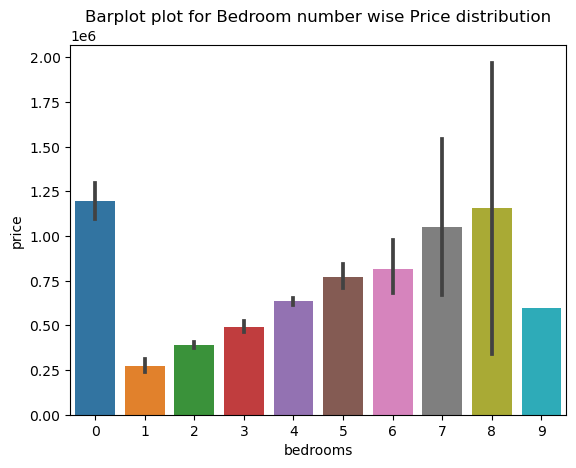

In [242]:
plt.title('Barplot plot for Bedroom number wise Price distribution')
sns.barplot(housing_price, x="bedrooms", y="price")

Plot is showing highest range of price distribution for bedroom number 8 along with bedroom 0, which is probably due to null value in bedrooms.

#### Exploring bathrooms  data 

- Plotting barplot to observe discrete variable bathrooms against price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.75'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.25'),
  Text(4, 0, '1.5'),
  Text(5, 0, '1.75'),
  Text(6, 0, '2.0'),
  Text(7, 0, '2.25'),
  Text(8, 0, '2.5'),
  Text(9, 0, '2.75'),
  Text(10, 0, '3.0'),
  Text(11, 0, '3.25'),
  Text(12, 0, '3.5'),
  Text(13, 0, '3.75'),
  Text(14, 0, '4.0'),
  Text(15, 0, '4.25'),
  Text(16, 0, '4.5'),
  Text(17, 0, '4.75'),
  Text(18, 0, '5.0'),
  Text(19, 0, '5.25'),
  Text(20, 0, '5.5'),
  Text(21, 0, '5.75'),
  Text(22, 0, '6.25'),
  Text(23, 0, '6.5'),
  Text(24, 0, '6.75'),
  Text(25, 0, '8.0')])

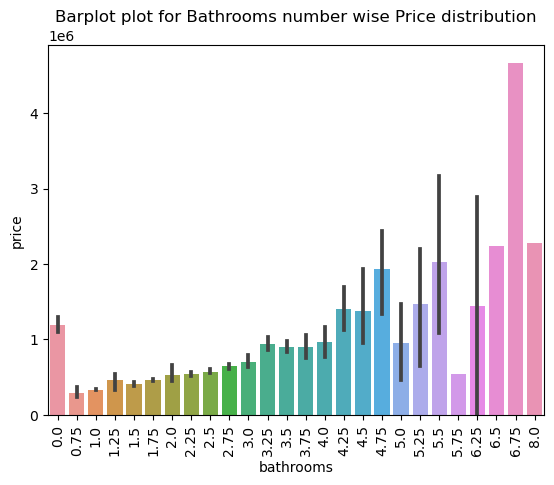

In [243]:
plt.title('Barplot plot for Bathrooms number wise Price distribution')
sns.barplot(housing_price, x="bathrooms", y="price")
plt.xticks(rotation=90) 

Plot is  showing housing price increase with number of bathrooms present upto bathroom count 5.5. After sudden price fall happened with 5.75 bathroom count and sudden price rise for 6.75 bathrooms count.

#### Exploring floors  data 

- Plotting barplot to observe discrete variable floors against price.

<Axes: title={'center': 'Barplot plot for floors wise Price distribution'}, xlabel='floors', ylabel='price'>

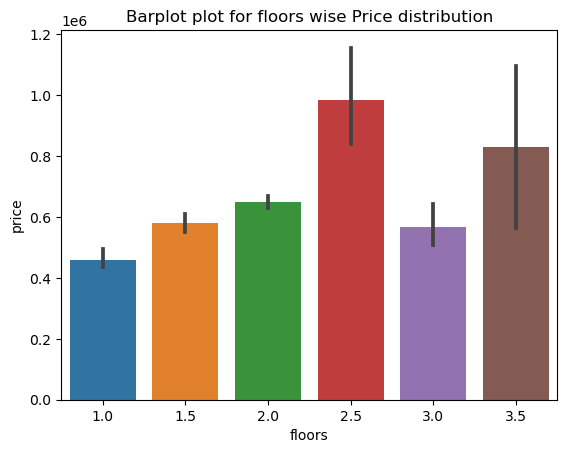

In [244]:
plt.title('Barplot plot for floors wise Price distribution')
sns.barplot(housing_price, x="floors", y="price")


Plot is showing housing price increase with floor number til 2.5th floor. After that price of the house lowered and rose again at 3.5th floor.


#### Exploring waterfront  data 

- Plotting barplot to observe discrete variable waterfront against price.

<Axes: title={'center': 'Barplot plot for waterfront wise Price distribution'}, xlabel='waterfront', ylabel='price'>

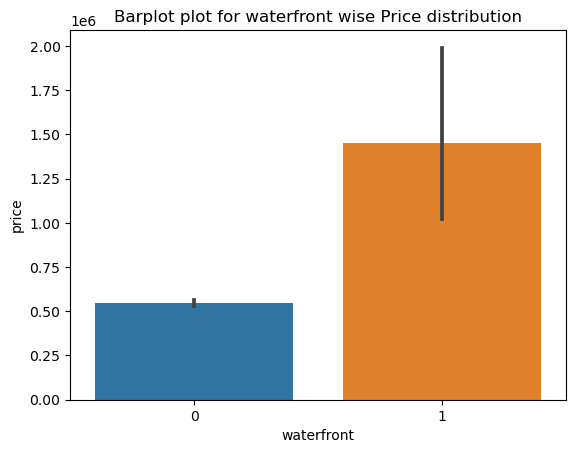

In [245]:
plt.title('Barplot plot for waterfront wise Price distribution')
sns.barplot(housing_price, x="waterfront", y="price")

Plot shows that house with waterfront is more costly than no waterfront view


#### Exploring - view  data 

- Plotting barplot to observe discrete variable - view against price.

<Axes: title={'center': 'Barplot plot for view wise Price distribution'}, xlabel='view', ylabel='price'>

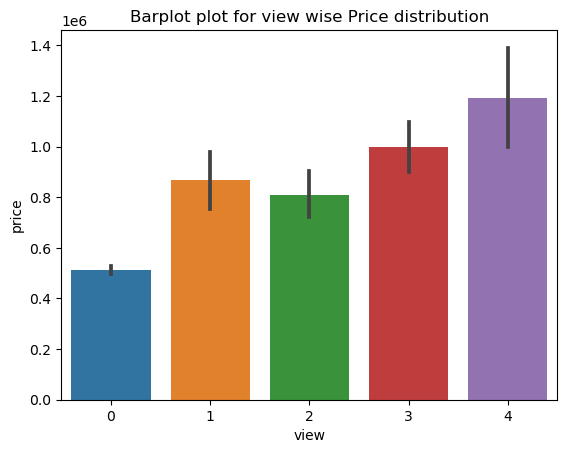

In [246]:
plt.title('Barplot plot for view wise Price distribution')
sns.barplot(housing_price, x="view", y="price")

House with more view is more expensive


#### Exploring - condition  data 

- Plotting barplot to observe discrete variable - condition against price.

<Axes: title={'center': 'Barplot plot for condition wise Price distribution'}, xlabel='condition', ylabel='price'>

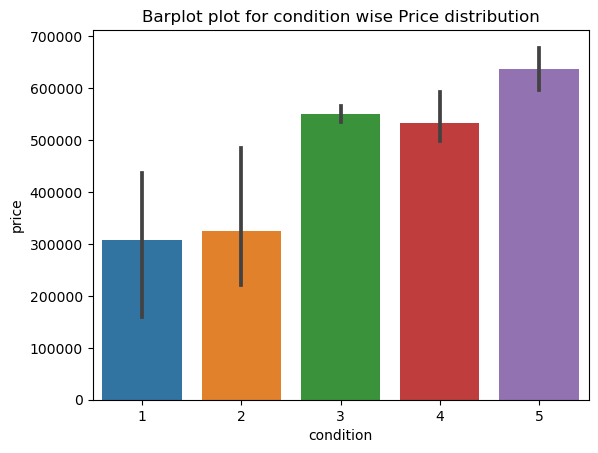

In [247]:
plt.title('Barplot plot for condition wise Price distribution')
sns.barplot(housing_price, x="condition", y="price")

House with atleast 3 condition are more expensive.


#### Exploring - yr_built  data 

- Plotting barplot to observe discrete variable - yr_built against price.

<Axes: title={'center': 'Line                                                                                                                                                                                                                                   plot for yr_built wise Price distribution'}, xlabel='yr_built', ylabel='price'>

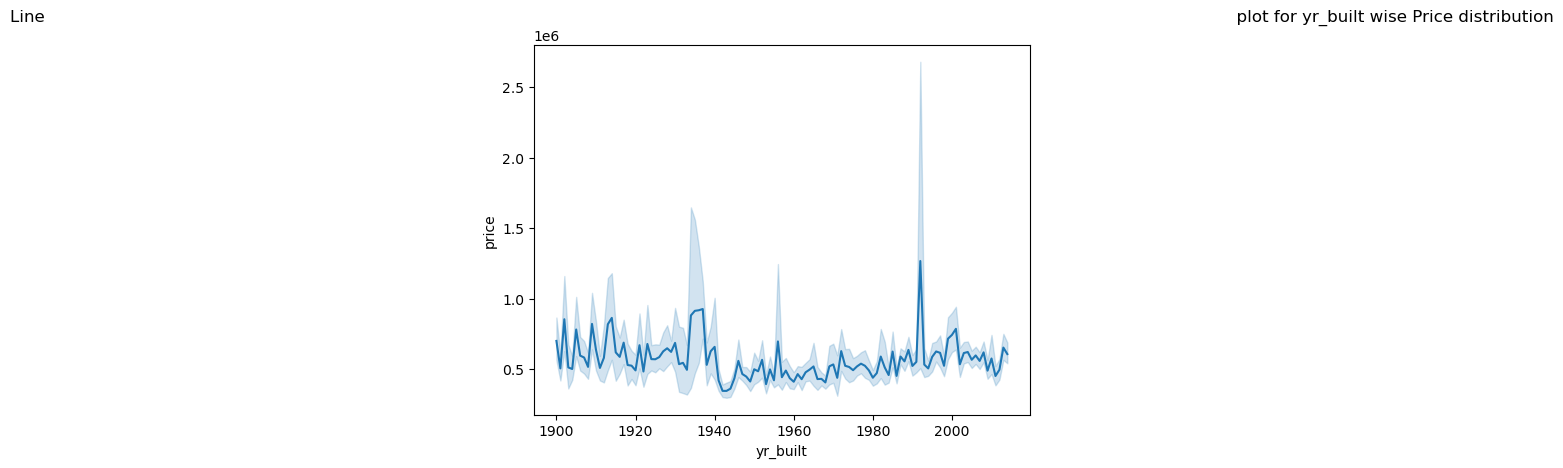

In [251]:
plt.title('Line                                                                                                                                                                                                                                   plot for yr_built wise Price distribution')
sns.lineplot(housing_price, x="yr_built", y="price")

So year built could have impacted house price. There is spike around the year built 1990


#### Exploring  yr_renovated  data 

- Plotting barplot to observe discrete variable  yr_renovated against price.

<Axes: title={'center': 'Barplot plot for yr_renovated wise Price distribution'}, xlabel='yr_renovated', ylabel='price'>

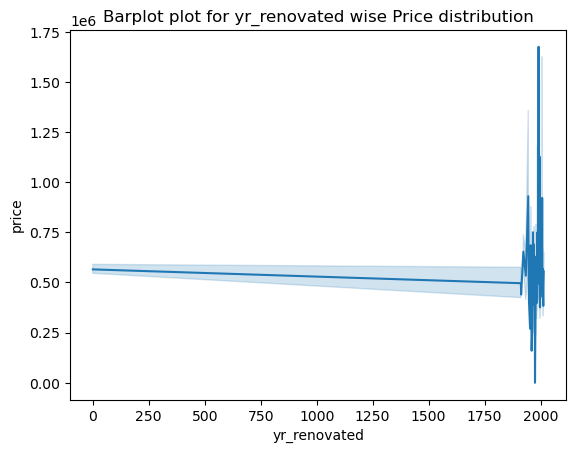

In [252]:
plt.title('Barplot plot for yr_renovated wise Price distribution')
sns.lineplot(housing_price, x="yr_renovated", y="price")

So year renovated could have impacted house price. There is spike around the year 2000

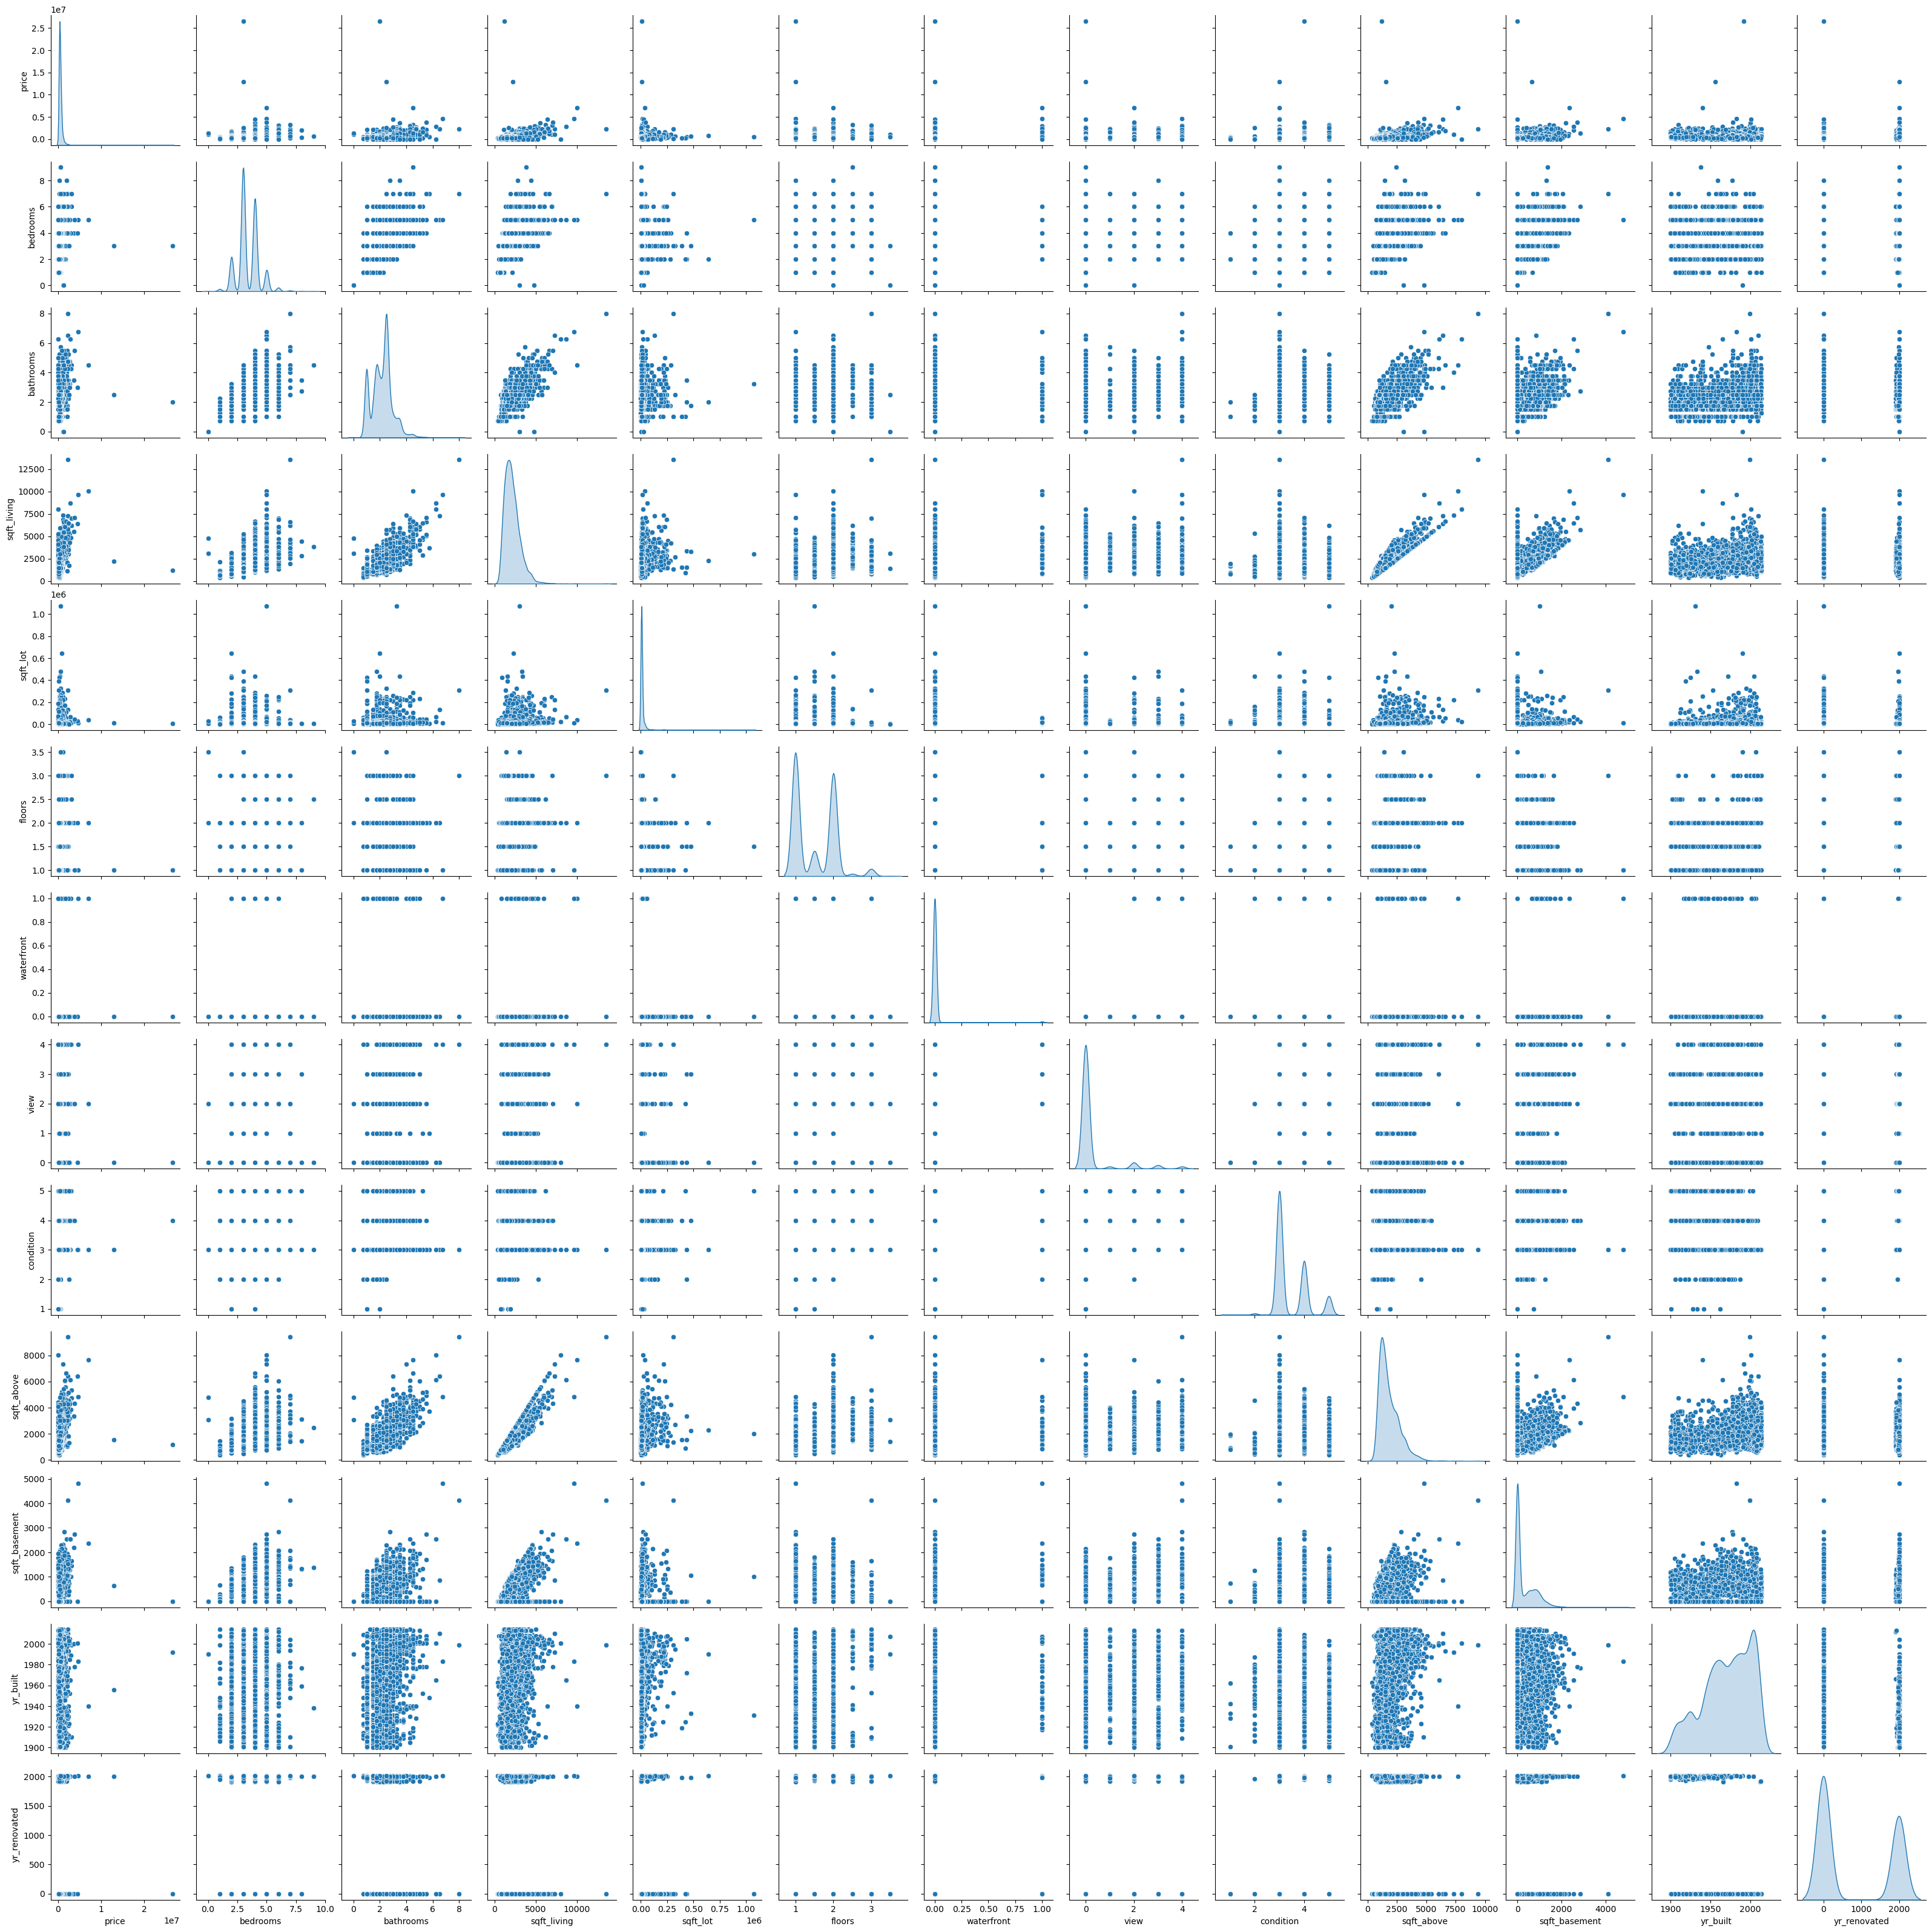

In [254]:
num_variables = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']

scatter_data = housing_price[num_variables]
sns.pairplot(scatter_data, diag_kind='kde')  

plt.show()


## 4.Checking missing values in each columns

In [255]:
# Checking null values in each columns
housing_price.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

#### Though there is no null value in this dataset , we will check for zero values in each columns.

First lets check the zero values in the target variable -Price and we will replcae any zero values with null and impute them with median values.

In [256]:
housing_price[housing_price['price']==0].price.count()

49

In [257]:
housing_price['price'] =  housing_price['price'].replace(0,np.nan)
housing_price[housing_price['price']==0].price.count()

0

In [258]:
housing_price['price'].median()

465000.0

In [259]:
housing_price['price'].fillna(value = housing_price.price.median(), inplace = True)

In [260]:
housing_price['price'].median()

465000.0

In [261]:
housing_price[housing_price['bedrooms']==0].bedrooms.count()
housing_price[housing_price['bathrooms']==0].bathrooms.count()
housing_price[housing_price['sqft_living']==0].sqft_living.count()
housing_price[housing_price['floors']==0].floors.count()
housing_price[housing_price['waterfront']==0].waterfront.count()
housing_price[housing_price['view']==0].view.count()
housing_price[housing_price['condition']==0].condition.count()
housing_price[housing_price['sqft_above']==0].sqft_above.count()
housing_price[housing_price['sqft_basement']==0].sqft_basement.count()
housing_price[housing_price['yr_built']==0].yr_built.count()
housing_price[housing_price['yr_renovated']==0].yr_renovated.count()
housing_price[housing_price['street']==0].street.count()
housing_price[housing_price['city']==0].city.count()
housing_price[housing_price['statezip']==0].statezip.count()
housing_price[housing_price['country']==0].country.count()

print("count of zero values in bedrooms : ",housing_price[housing_price['bedrooms']==0].bedrooms.count())
print("count of zero values in bathrooms : ",housing_price[housing_price['bathrooms']==0].bathrooms.count())
print("count of zero values in sqft_living: ",housing_price[housing_price['sqft_living']==0].sqft_living.count())
print("count of zero values in sqft_lot   : ",housing_price[housing_price['floors']==0].floors.count())
print("count of zero values in floors : ",housing_price[housing_price['waterfront']==0].waterfront.count())
print("count of zero values in waterfront  : ",housing_price[housing_price['view']==0].view.count())
print("count of zero values in view : ",housing_price[housing_price['condition']==0].condition.count())
print("count of zero values in condition  : ",housing_price[housing_price['sqft_above']==0].sqft_above.count())
print("count of zero values in sqft_above : ",housing_price[housing_price['sqft_basement']==0].sqft_basement.count())
print("count of zero values in sqft_basement : ",housing_price[housing_price['yr_built']==0].yr_built.count())
print("count of zero values in yr_built : ",housing_price[housing_price['yr_renovated']==0].yr_renovated.count())
print("count of zero values in yr_renovated : ",housing_price[housing_price['street']==0].street.count())
print("count of zero values in street: ",housing_price[housing_price['city']==0].city.count())
print("count of zero values in city  : ",housing_price[housing_price['statezip']==0].statezip.count())
print("count of zero values in statezip : ",housing_price[housing_price['country']==0].country.count())

count of zero values in bedrooms :  2
count of zero values in bathrooms :  2
count of zero values in sqft_living:  0
count of zero values in sqft_lot   :  0
count of zero values in floors :  4567
count of zero values in waterfront  :  4140
count of zero values in view :  0
count of zero values in condition  :  0
count of zero values in sqft_above :  2745
count of zero values in sqft_basement :  0
count of zero values in yr_built :  2735
count of zero values in yr_renovated :  0
count of zero values in street:  0
count of zero values in city  :  0
count of zero values in statezip :  0


## 5.Summary statistics for numerical columns, such as mean, median, standard deviation etc

Numerical variables in this dataset are: 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'.
 So, we will filter out these numerical variables to check the summary statistics.

In [262]:
housing_price[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']].describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.569162e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.609987e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    7.800000e+03     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.281582e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.650000e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

#### Here price and sqft_lot attributes' values are higher than that of the other attrbutes' value and values are in exponents
#### we have taken natural logarithm to scale these two variables and computed descriptive statistics for them.


In [263]:
np.log(housing_price[['price','sqft_lot']]).describe()

price     sqft_lot
count  4600.000000  4600.000000
mean     13.064801     9.002095
std       0.539892     0.910676
min       8.961879     6.458338
25%      12.701251     8.517343
50%      13.049793     8.946765
75%      13.392333     9.305764
max      17.096046    13.887104

## 6. Distribution of the numerical feature “price” using a distribution plot such as a histogram.

<Axes: title={'center': 'Histogram plot for Price attribute'}, xlabel='price', ylabel='Count'>

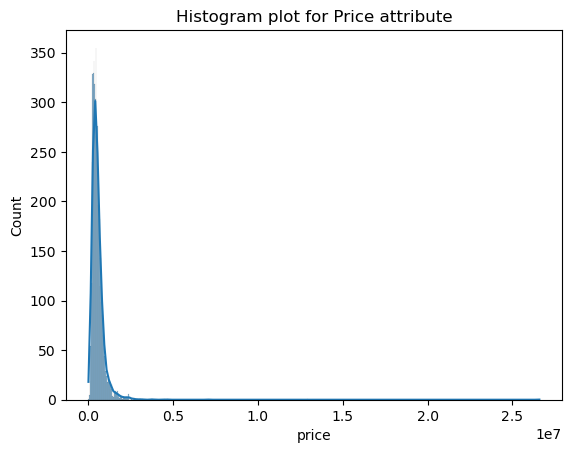

In [264]:
plt.title('Histogram plot for Price attribute')
sns.histplot(data=housing_price.price,kde=True)


#### Here is histogram is showing price is skewed and not normalized. Now, lets the plot the price in log scale.

<Axes: title={'center': 'Histogram plot for Price attribute in log-scale'}, xlabel='price', ylabel='Count'>

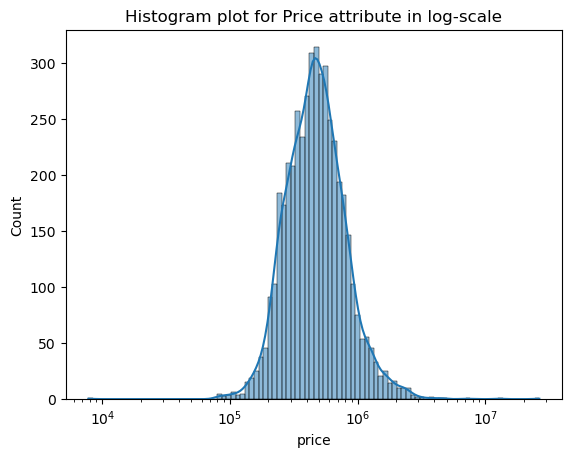

In [265]:
plt.title('Histogram plot for Price attribute in log-scale')
sns.histplot(data=housing_price.price,kde=True,log_scale=True)

After putting price in log scale, price got normally distributed.

## 7. Observe the histogram, Does it look like it falls under any probability distribution? Does it look like a bell curve?

<Axes: title={'center': 'Histogram plot for Price attribute'}, xlabel='price', ylabel='Count'>

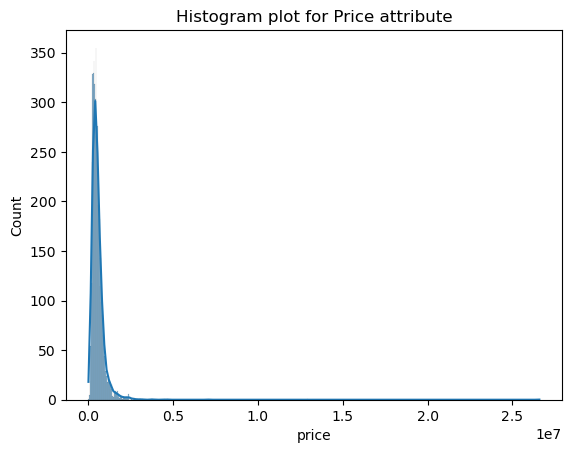

In [266]:
plt.title('Histogram plot for Price attribute')
sns.histplot(data=housing_price.price,kde=True)


Histogram for price data does not look like normalized.
Price data without normalization does not look like a bell curve. So, let us perform log transformation on Price attribute. Then we will check the histogram again for nomalization.

In [267]:

housing_price_log=pd.DataFrame(data=np.log(housing_price['price']))
housing_price_log

price
0     12.653958
1     14.684290
2     12.742566
3     12.948010
4     13.217674
...         ...
4595  12.638394
4596  13.188775
4597  12.940611
4598  12.222930
4599  12.304106

[4600 rows x 1 columns]

#### House price has risen exponentially in this dataset. So to bring linearity , log of the values were taken.Also, some of the values were transformed into undefined values after log transformation. So, we have replaced them those into null values and removed them from dataset for analysis.

In [268]:
housing_price_log.replace([np.inf, -np.inf], np.nan, inplace=True)


In [269]:
housing_price_log.dropna(subset=["price"], how="all", inplace=True)

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_4312\3254565227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_price_log.price, bins=15)


<Axes: xlabel='price', ylabel='Density'>

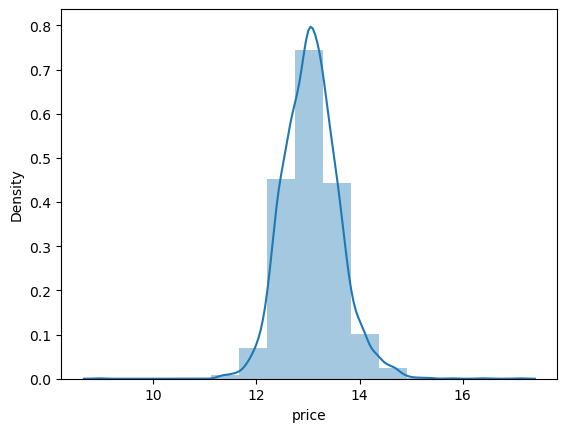

In [270]:
sns.distplot(housing_price_log.price, bins=15)

#### The histogram for the house price looks like a normal distribution or bell curve after performing normalization through logarithmic transformation. Density of the mean price is highest in the middle of the curve and on the both side density decreases gradually.

## 8.Use the Shapiro-Wilk test to do a normality test and check if the “price” feature followsthe normal distribution (if the p-value is greater than 0.05 then the feature follows the Normal distribution)

#### "The Shapiro-Wilk test is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution."[REF: https://builtin.com/data-science/shapiro-wilk-test]

In [271]:
#importing the library
from scipy.stats import shapiro

In [272]:
#perform shapiro test
stat,p_value = shapiro(housing_price['price'])

In [273]:
print("Shapiro-Wilk test result: \n statistics  : %.3f, p_value : %f" % (stat,p_value))

Shapiro-Wilk test result: 
 statistics  : 0.369, p_value : 0.000000


### Since p_value here is close to zero , hence it is against the null hypothesis.

### So price is not normally distributed as it seems to be in the log graph.

## 9.Consider the Hypothesis "The year built has a significant impact on sale price.”. Do a hypothesis test using a t-test: split into two groups: properties built before 1990 and those built-in or after 1990. (alpha/confidence interval= 95%)

In [274]:
### Filtering the dataset based on yr_built attribute value
## dataset for price before 1990
housing_price_before_1990=housing_price[housing_price['yr_built']<1990]

In [275]:
housing_price_before_1990.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0         3       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0         5       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0         3       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0         3       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [276]:
## dataset for price after and equal 1990
housing_price_after_1990=housing_price[housing_price['yr_built']>=1990]

In [277]:
housing_price_after_1990.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
17  2014-05-02 00:00:00  367500.0         4       3.00         3110      7231   
22  2014-05-02 00:00:00  626000.0         3       2.25         1750      1572   
23  2014-05-02 00:00:00  612500.0         4       2.50         2730     12261   
31  2014-05-02 00:00:00  499950.0         4       2.50         2860      3345   
33  2014-05-02 00:00:00  625000.0         4       2.50         2820      8408   

    floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
17     2.0           0     0          3        3110              0      1997   
22     2.5           0     0          3        1470            280      2005   
23     2.0           0     0          3        2730              0      1991   
31     2.0           0     0          3        2190            670      2004   
33     2.0           0     0          3        2820              0      2014   

    yr_renovated               street         city  statezip country  
17             0    11224 SE 306th Pl       Auburn  WA 98092     USA  
22             0  3140 Franklin Ave E      Seattle  WA 98102     USA  
23             0    10212 NE 156th Pl      Bothell  WA 98011     USA  
31          2003   20120 137th Ave NE  Woodinville  WA 98072     USA  
33             0     17052 4th Ave NE    Shoreline  WA 98155     USA

####  hypothesis tests (t-test) on Price
Given hypothesis is :"The year built has a significant impact on sale price.” which means mean sale prices are different for the group of houses which are build before 1990 and on and after 1990.
So , 
##### the null hypotheis is , H0 : mean sale price for the group of houses built before 1990 = mean sale price for the group of houses built on and after 1990
##### and H1 : mean sale price for the group of houses built before 1990 <> mean sale price for the group of houses built on and after 1990

In [278]:
housing_price_before_1990['price'].mean()

527914.4172592114

In [279]:
housing_price_after_1990['price'].mean()

616498.9907038512

In [280]:
#Performing t-test 
t_statistic, p_value_ttest = ttest_ind(housing_price_before_1990['price'], housing_price_after_1990['price'])

In [281]:
print("Independent t-test results: \n")
print("T-stat:", t_statistic)
print("P-val:", p_value_ttest)


Independent t-test results: 

T-stat: -5.038932498004841
P-val: 4.860904181665788e-07


#### Hypothesis testing with alpha/Confidence Interval= 95%

In [282]:
alpha = 0.05
if p_value_ttest > alpha:
    print("Cannot reject null hypothesis (H0 wins): There is no significant difference between the groups.")
else:
    print("Cannot accept H0 (H1 wins): There is a significant difference between the groups.")

Cannot accept H0 (H1 wins): There is a significant difference between the groups.


##### Hence, mean sale price for the group of houses built before 1900 <> mean sale price for the group of houses built on and after 1900. Also, we can conclude that "The year built has a significant impact on sale price.”

## 10.Hypothesis test using ANOVA: Assume that you have 3 groups: groupA has all houses built in 1990, groupB has all houses that were built in 2000 and groupC has all houses built in 2010 
        (alpha/confidence interval = 95%)


#### We will be slicing the housing price dataframe and taking three dataframes based on the year built. Also, we will be performing ANOVA on price attribute for these three dataframes.

In [283]:
housing_price_group_A=housing_price[housing_price['yr_built']==1990]
housing_price_group_B=housing_price[housing_price['yr_built']==2000]
housing_price_group_C=housing_price[housing_price['yr_built']==2010]

In [284]:
#housing_price_group_A

In [285]:
housing_price_group_A.price

43       439950.0
70       331950.0
90       800866.0
305      375000.0
373     1250000.0
          ...    
4408     465000.0
4413     465000.0
4419     673476.0
4468     315368.0
4599     220600.0
Name: price, Length: 71, dtype: float64

In [286]:
Fstat,p_value_anova=f_oneway(housing_price_group_A.price,housing_price_group_B.price,housing_price_group_C.price)

In [287]:
print("Oneway ANOVA test results: \n")
print("F-stat:", Fstat)
print("P-value:", p_value_anova)


Oneway ANOVA test results: 

F-stat: 3.77087560855892
P-value: 0.025338080522518003


In [288]:
print('Decision from ANOVA test results : \n')

if p_value_anova > 0.05:
    print("cannot reject H0: There is no difference in the mean housing price")
else:
        print("cannot reject H1: There is significant difference in the mean housing price")

Decision from ANOVA test results : 

cannot reject H1: There is significant difference in the mean housing price


##### Hence, ANOVA test proves that the mean sale price for the group of houses built on 1990,2000 and 2010 are significantly different. 

##### Also, we can conclude that "The year built has a significant impact on sale price.”

## 11.Does the ANOVA conclusion change from the t-test or is it the same?

We can conclude that T-Test and ANOVA tests are showing similar outcomes ie. year built has a significant impact on house price

## 12.Calculate the covariance matrix of the numerical features present in the dataset.

Numerical features in the dataset are:

['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']

We will consider these variables only to compute covariance.

In [289]:
housing_price.select_dtypes('number').cov()

price       bedrooms      bathrooms   sqft_living  \
price          3.147196e+11  105527.536911  147223.637192  2.369606e+08   
bedrooms       1.055275e+05       0.826005       0.388879  5.207667e+02   
bathrooms      1.472236e+05       0.388879       0.614313  5.746279e+02   
sqft_living    2.369606e+08     520.766735     574.627928  9.277676e+05   
sqft_lot       1.028706e+09    2244.440169    3032.987546  7.277080e+06   
floors         4.590944e+04       0.087030       0.205224  1.787990e+02   
waterfront     6.723258e+03      -0.000267       0.005043  9.561981e+00   
view           1.030395e+05       0.078547       0.129317  2.331839e+02   
condition      1.443049e+04       0.015437      -0.063693 -4.098216e+01   
sqft_above     1.810041e+08     379.805727     466.213556  7.278398e+05   
sqft_basement  5.595648e+07     140.961008     108.414371  1.999278e+05   
yr_built       3.621045e+05       3.849544      10.801007  8.241284e+03   
yr_renovated  -1.586927e+07     -54.371088    -165.724334 -1.158628e+05   

                   sqft_lot        floors   waterfront           view  \
price          1.028706e+09  45909.436266  6723.258144  103039.539120   
bedrooms       2.244440e+03      0.087030    -0.000267       0.078547   
bathrooms      3.032988e+03      0.205224     0.005043       0.129317   
sqft_living    7.277080e+06    178.799031     9.561981     233.183935   
sqft_lot       1.287693e+09     72.430823    52.219389    2064.408500   
floors         7.243082e+01      0.289754     0.001001       0.013078   
waterfront     5.221939e+01      0.001001     0.007124       0.023714   
view           2.064409e+03      0.013078     0.023714       0.605914   
condition      1.356329e+01     -0.100255     0.000020       0.033252   
sqft_above     6.696771e+06    242.635523     5.742388     116.993512   
sqft_basement  5.803091e+05    -63.836492     3.819593     116.190423   
yr_built       5.409914e+04      7.481705    -0.059132      -1.491941   
yr_renovated  -7.988735e+05   -123.364266     0.712965      17.509601   

                  condition    sqft_above  sqft_basement       yr_built  \
price          14430.490533  1.810041e+08   5.595648e+07  362104.540832   
bedrooms           0.015437  3.798057e+02   1.409610e+02       3.849544   
bathrooms         -0.063693  4.662136e+02   1.084144e+02      10.801007   
sqft_living      -40.982165  7.278398e+05   1.999278e+05    8241.284422   
sqft_lot          13.563290  6.696771e+06   5.803091e+05   54099.138794   
floors            -0.100255  2.426355e+02  -6.383649e+01       7.481705   
waterfront         0.000020  5.742388e+00   3.819593e+00      -0.059132   
view               0.033252  1.169935e+02   1.161904e+02      -1.491941   
condition          0.458640 -1.040464e+02   6.306427e+01      -8.048041   
sqft_above      -104.046439  7.433353e+05  -1.549557e+04   10472.341362   
sqft_basement     63.064274 -1.549557e+04   2.154234e+05   -2231.056939   
yr_built          -8.048041  1.047234e+04  -2.231057e+03     883.982809   
yr_renovated    -123.914539 -1.354667e+05   1.960384e+04   -9357.424457   

               yr_renovated  
price         -1.586927e+07  
bedrooms      -5.437109e+01  
bathrooms     -1.657243e+02  
sqft_living   -1.158628e+05  
sqft_lot      -7.988735e+05  
floors        -1.233643e+02  
waterfront     7.129653e-01  
view           1.750960e+01  
condition     -1.239145e+02  
sqft_above    -1.354667e+05  
sqft_basement  1.960384e+04  
yr_built      -9.357424e+03  
yr_renovated   9.592528e+05


**Few Observations:**

. Covariance matrix is showing some positive and nagtive covariance values.

. Price and bedroom have high positive covariance values but we can not conclude that these two attributes has high postive relation.

. Similary,Price and bathrooms have high positive covariance values but we can not conclude here too that these two attributes has high postive relation.

.bedrooms and bathrooms have covariance value near to zero which means these two features do not have covariance.

.yr_renovated and sqft_lot have high negative covariance which indicates that these two features are having relations in oppostie directions.

.Similarly,sqft_above and condition have high negative covariance which indicates that these two features are having relations in oppostie directions.

##  13.Create a heatmap of the covariance matrix. What do the colors in the heatmap represent?

In [290]:
# Let us store the covariance marix in a dataframe and plot a heatmap
housing_price_numerical_cov=housing_price.select_dtypes('number').cov()


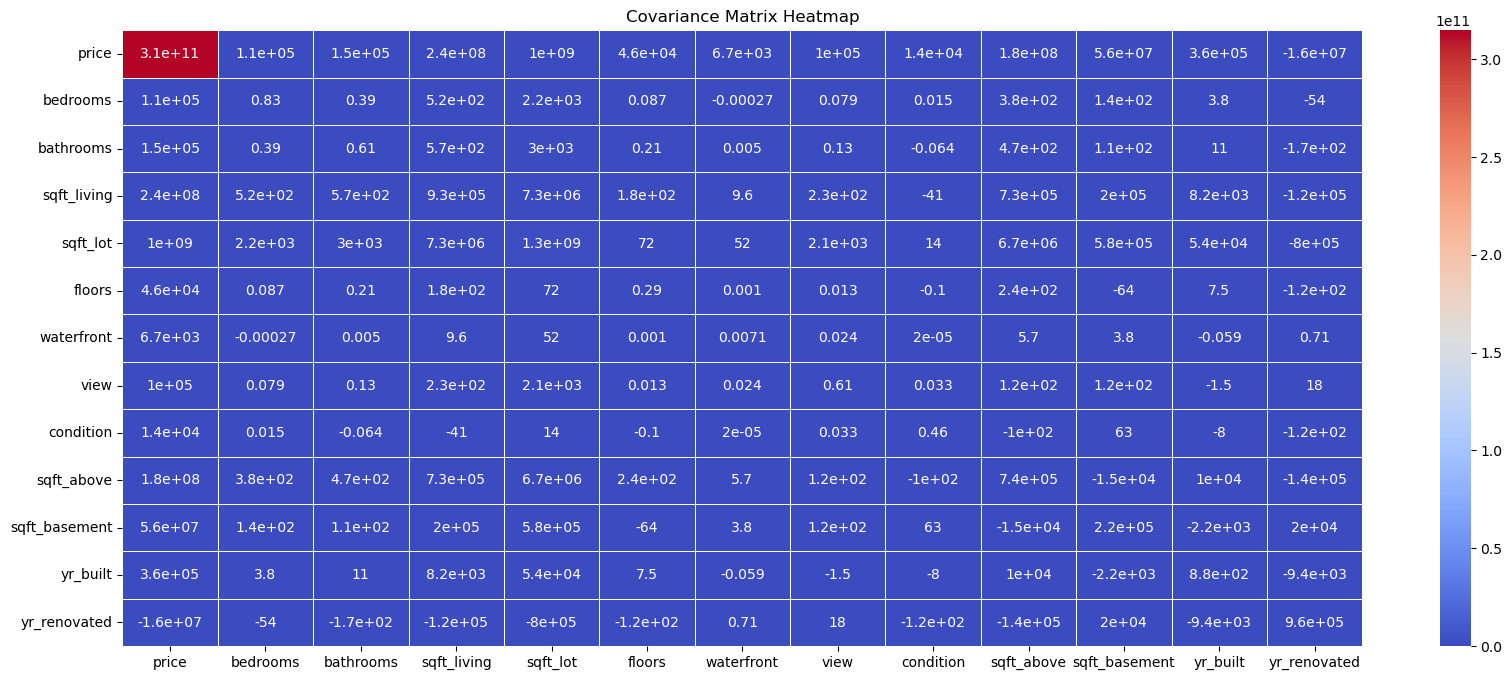

In [291]:
#Heatmap for covariance matrix
plt.figure(figsize=(20, 8))
sns.heatmap(housing_price_numerical_cov, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [292]:
#Let us compute covariance matrix for normalized numerical features.
numerical_features=housing_price.select_dtypes('number')
normalized_features = (numerical_features - numerical_features.mean()) / numerical_features.std()
housing_price_numerical_cov_norm = normalized_features.cov()
housing_price_numerical_cov_norm

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.206972   0.334827     0.438525  0.051100  0.152029   
bedrooms       0.206972  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.334827  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.438525  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.051100  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.152029  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.141989 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.235959  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.037982  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.374226  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.214903  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021710  0.142461   0.463498     0.287775  0.050706  0.467481   
yr_renovated  -0.028882 -0.061082  -0.215886    -0.122817 -0.022730 -0.233996   

               waterfront      view  condition  sqft_above  sqft_basement  \
price            0.141989  0.235959   0.037982    0.374226       0.214903   
bedrooms        -0.003483  0.111028   0.025080    0.484705       0.334165   
bathrooms        0.076232  0.211960  -0.119994    0.689918       0.298020   
sqft_living      0.117616  0.311009  -0.062826    0.876443       0.447206   
sqft_lot         0.017241  0.073907   0.000558    0.216455       0.034842   
floors           0.022024  0.031211  -0.275013    0.522814      -0.255510   
waterfront       1.000000  0.360935   0.000352    0.078911       0.097501   
view             0.360935  1.000000   0.063077    0.174327       0.321602   
condition        0.000352  0.063077   1.000000   -0.178196       0.200632   
sqft_above       0.078911  0.174327  -0.178196    1.000000      -0.038723   
sqft_basement    0.097501  0.321602   0.200632   -0.038723       1.000000   
yr_built        -0.023563 -0.064465  -0.399698    0.408535      -0.161675   
yr_renovated     0.008625  0.022967  -0.186818   -0.160426       0.043125   

               yr_built  yr_renovated  
price          0.021710     -0.028882  
bedrooms       0.142461     -0.061082  
bathrooms      0.463498     -0.215886  
sqft_living    0.287775     -0.122817  
sqft_lot       0.050706     -0.022730  
floors         0.467481     -0.233996  
waterfront    -0.023563      0.008625  
view          -0.064465      0.022967  
condition     -0.399698     -0.186818  
sqft_above     0.408535     -0.160426  
sqft_basement -0.161675      0.043125  
yr_built       1.000000     -0.321342  
yr_renovated  -0.321342      1.000000

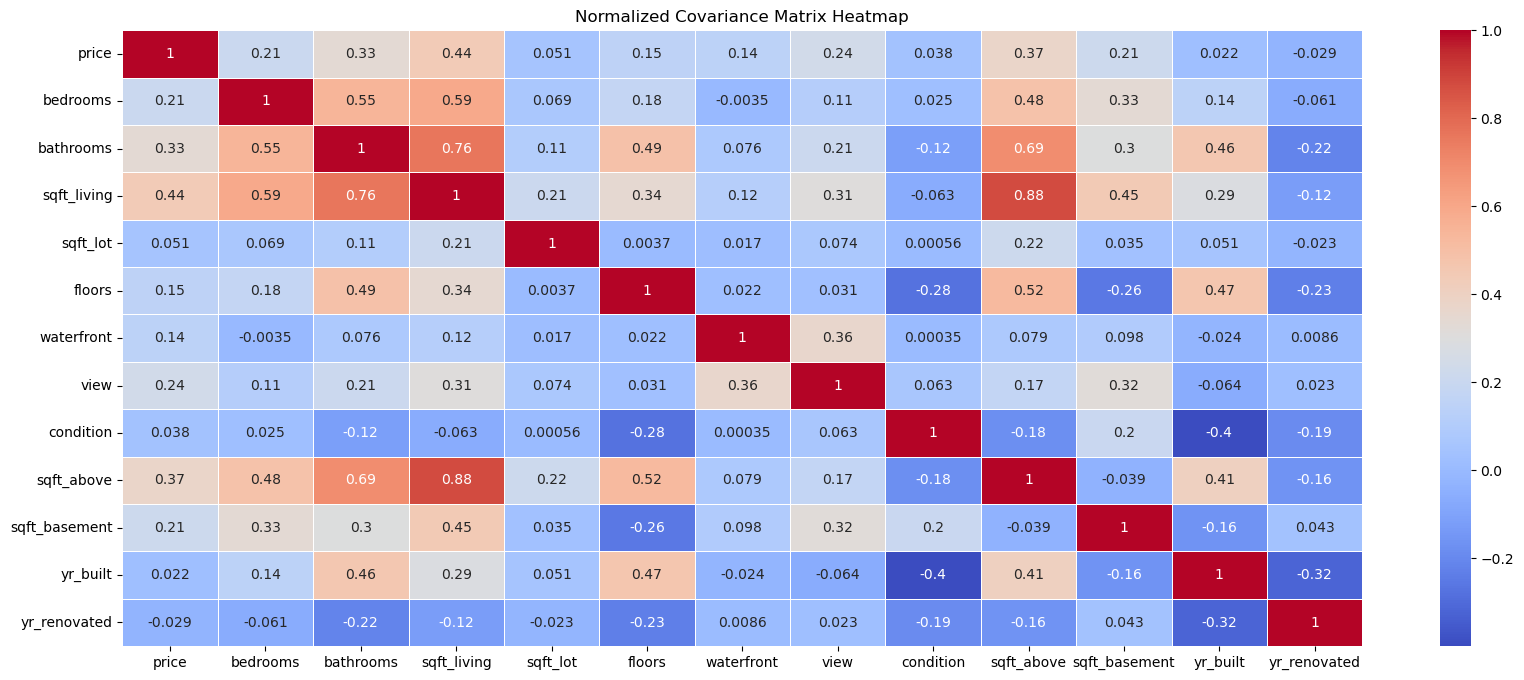

In [293]:
plt.figure(figsize=(20, 8))
sns.heatmap(housing_price_numerical_cov_norm, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Normalized Covariance Matrix Heatmap')
plt.show()

**Observation:**
   - Extreme warm color (Red) denotes positive linear relationship between the two parameters in the matrix.
   - Extreme cool color (Blue) denotes negative linear relationship between the two parameters in the matrix.
   - Neutral color (Grey/White) denotes no linear relationship between the two parameters in the matrix.
   
   **Few inferences from the above heatmap:**
   - Here, bathroom and sqft_living are showing positive linear relationship
   - While, yr_renovated and yr_built are showing negative linear relationship
   - And, sqft_living and floors denotes no linear relationship

## 14. Compute the eigenvalue, eigenvector, and Rank of the covariance matrix.

In [294]:
#Eigenvalues and eigenvector computation for covariance matrix.
eigenvalue,eigenvector=nla.eig(housing_price_numerical_cov)

In [295]:
print("eigenvalue is of covariance matrix is: ",eigenvalue)

eigenvalue is of covariance matrix is:  [3.14723250e+11 1.28437901e+09 1.30256158e+06 8.91632173e+05
 2.95990887e+05 6.50296503e+02 5.84658038e-01 4.70958620e-01
 3.29025300e-01 2.33593745e-01 1.27732788e-01 6.13138386e-03
 1.37944219e-09]


In [296]:
print("Real eigenvalue is of covariance matrix is: ",eigenvalue.real)

Real eigenvalue is of covariance matrix is:  [3.14723250e+11 1.28437901e+09 1.30256158e+06 8.91632173e+05
 2.95990887e+05 6.50296503e+02 5.84658038e-01 4.70958620e-01
 3.29025300e-01 2.33593745e-01 1.27732788e-01 6.13138386e-03
 1.37944219e-09]


In [297]:
print("eigenvector is of covariance matrix is: ",eigenvector)

eigenvector is of covariance matrix is:  [[ 9.99994148e-01 -3.28860163e-03 -8.68577940e-04 -3.47355001e-04
   1.17489869e-04 -6.12586932e-06 -1.74991510e-07  6.47379335e-08
  -2.82833843e-08 -7.81052805e-08 -5.36764094e-09  9.57559075e-09
   3.67941279e-15]
 [ 3.35326113e-07  1.48075843e-06  3.89446253e-04  2.05383373e-04
  -3.15488093e-04  4.69069469e-04 -7.74668668e-01 -5.76143095e-01
  -8.91534851e-02 -2.29236115e-01 -8.60877059e-02 -6.20050966e-03
   3.26041974e-08]
 [ 4.67818817e-07  1.98850649e-06  4.59787003e-04  1.13452571e-04
  -1.54817627e-04 -7.07859558e-03 -1.36655583e-01 -1.88876625e-01
  -1.26812608e-01  7.65866227e-01  5.85634050e-01  8.70826241e-04
  -1.13385505e-08]
 [ 7.52992407e-04  5.06539371e-03  6.72365144e-01  3.27797615e-01
  -3.27273500e-01  2.43982701e-03  2.60261192e-04  4.96302004e-04
   4.08022487e-05 -1.84882567e-04 -1.76998012e-04  4.25239380e-07
  -5.77350269e-01]
 [ 3.28204579e-03  9.99970234e-01 -6.58269362e-03 -2.30344268e-03
  -3.46482129e-04 -2.9120

In [298]:
eigenvector.max()

0.999994148070237


## 15. Interpret the Eigenvectors in the context of the dataset. What do they represent and their significance?

An eigenvectors of covariance matrix are non-zero vectors with the directions in which the data varies the most.
The eigenvectors of a covariance matrix are orthogonal and form a basis for the vector space. They are also called the principal components of the covariance matrix. The eigenvectors with the largest eigenvalues are often used in dimensionality reduction techniques such as PCA (Principal Component Analysis).

[Ref: https://www.quora.com/What-is-an-eigenvector-of-a-covariance-matrix
https://builtin.com/data-science/covariance-matrix]

Highest eigenvector value here is 0.9999941480702972 and it signifies that price is most influential and will give direction of maximum variance.


## 16. Calculate the inverse of the covariance matrix

In [299]:
print("Inverse of the covariance matrix")
nla.inv(housing_price_numerical_cov)

Inverse of the covariance matrix


array([[ 4.10962970e-12,  2.30907360e-07, -2.53421600e-07,
        -5.62367004e-10,  2.89980891e-12, -1.47077094e-07,
        -1.57157537e-06, -1.98975350e-07, -1.40804783e-07,
         9.00934590e-10,  1.21999151e-09,  9.83475274e-09,
        -2.96549615e-11],
       [ 2.30907360e-07,  2.04465900e+00, -7.00668004e-01,
        -2.74747317e-03,  2.41086945e-06,  1.39484991e-01,
         1.00664978e+00,  1.97586538e-01, -1.48710839e-01,
        -1.87182835e-03,  9.87490380e-06,  4.26614695e-03,
        -6.55329800e-05],
       [-2.53421600e-07, -7.00668004e-01,  5.35271428e+00,
        -1.30458090e-02,  2.22581212e-06, -1.72060708e+00,
        -1.32922303e-01, -7.09406483e-02, -1.66032560e-01,
         8.21021350e-03,  7.19882033e-03, -3.25079059e-02,
         1.05727985e-04],
       [-1.80544706e-09, -3.16973196e-03, -7.84097070e-03,
        -3.43597384e+09, -2.20643946e-08,  3.51119722e-03,
        -5.97216412e-03, -7.03948422e-04,  1.91331161e-03,
         3.43597384e+09,  3.43597384e

## 17. Discuss the impact of the matrix rank on the feasibility of solving a linear regression problem using these features.

In [300]:
print("Rank of covariant matrix is : ", nla.matrix_rank(housing_price_numerical_cov))

Rank of covariant matrix is :  12


In [301]:
housing_price_numerical_cov.shape

(13, 13)

In [302]:
housing_price_with_num=housing_price.select_dtypes('number')
housing_price_with_num

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      313000.0         3       1.50         1340      7912     1.5   
1     2384000.0         5       2.50         3650      9050     2.0   
2      342000.0         3       2.00         1930     11947     1.0   
3      420000.0         3       2.25         2000      8030     1.0   
4      550000.0         4       2.50         1940     10500     1.0   
...         ...       ...        ...          ...       ...     ...   
4595   308166.0         3       1.75         1510      6360     1.0   
4596   534333.0         3       2.50         1460      7573     2.0   
4597   416904.0         3       2.50         3010      7014     2.0   
4598   203400.0         4       2.00         2090      6630     1.0   
4599   220600.0         3       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3        1340              0      1955   
1              0     4          5        3370            280      1921   
2              0     0          4        1930              0      1966   
3              0     0          4        1000           1000      1963   
4              0     0          4        1140            800      1976   
...          ...   ...        ...         ...            ...       ...   
4595           0     0          4        1510              0      1954   
4596           0     0          3        1460              0      1983   
4597           0     0          3        3010              0      2009   
4598           0     0          3        1070           1020      1974   
4599           0     0          4        1490              0      1990   

      yr_renovated  
0             2005  
1                0  
2                0  
3                0  
4             1992  
...            ...  
4595          1979  
4596          2009  
4597             0  
4598             0  
4599             0  

[4600 rows x 13 columns]

In [303]:
print("Rank of housing_price_with_num matrix is : ", nla.matrix_rank(housing_price_with_num))

Rank of housing_price_with_num matrix is :  12


#### Discussion:

Here matrix from housing price (numerical fields) dataset has rank =12 but the number of columns and rows of this matrix is 13. So number of independent rows/columns in this matrix is 12.So it is a singular matrix. We can not solve linear regression problem with singular or rank deficit matrix.

If a square matrix is of full rank, there is one solution to the equation. If the matrix is not of full rank, then there are infinitely many solutions. Here the matrix is not full rank. Matrix rank signifies how much “information” is “preserved” by the matrix, and the nullity how much information is “destroyed”.

[Ref:https://thanifbutt.medium.com/what-does-the-rank-of-a-matrix-tell-us-about-the-solution-b9336775ad3f]

## 18. How does the rank relate to multicollinearity among the independent variables? Provide examples from the dataset.

Rank of matrix indicates number of independent rows or columns based on row rank or columns rank for that matrix. When the rank of a square matrix is full rank, the rows/columns of that matrix are linearly independent,  but if the matrix is not full matrix that indicates there exist some dependency between the independent variables.Thus there exists some correlation between independent variable. This is called multicollinearity among independent variables.

Now the heat map shows that price is dependent variable. So here our target variable is price an rest of the variables are independent variables. We will check matrix ranking in order to check multicollinearity here.

So, lets remove the dependent price variable from housing_price_with_num dataset to check the ranking of th rest of the matrix.

In [304]:
housing_price_with_num_ind=housing_price_with_num.drop(columns=['price'])

In [305]:
housing_price_with_num_ind

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0            3       1.50         1340      7912     1.5           0     0   
1            5       2.50         3650      9050     2.0           0     4   
2            3       2.00         1930     11947     1.0           0     0   
3            3       2.25         2000      8030     1.0           0     0   
4            4       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595         3       1.75         1510      6360     1.0           0     0   
4596         3       2.50         1460      7573     2.0           0     0   
4597         3       2.50         3010      7014     2.0           0     0   
4598         4       2.00         2090      6630     1.0           0     0   
4599         3       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0             3        1340              0      1955          2005  
1             5        3370            280      1921             0  
2             4        1930              0      1966             0  
3             4        1000           1000      1963             0  
4             4        1140            800      1976          1992  
...         ...         ...            ...       ...           ...  
4595          4        1510              0      1954          1979  
4596          3        1460              0      1983          2009  
4597          3        3010              0      2009             0  
4598          3        1070           1020      1974             0  
4599          4        1490              0      1990             0  

[4600 rows x 12 columns]

In [306]:
print("Rank of numerical matrix is : ", nla.matrix_rank(housing_price_with_num_ind))

Rank of numerical matrix is :  11


Even after removing dependent target variable Price fronm the data set , rank of the matrix is showing 11 which is lessser than number of fetures in the dataset (12).
Hence, there atleast one multicollinearity in the dataset and number of independent features is 11.

## 19.Create a matrix X with the selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built'] and Y with the target feature and Print matrix X and Y

In [307]:
#creating dataframe x with features: ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
x=housing_price_with_num[['bedrooms', 'sqft_lot', 'floors', 'yr_built']]
print('Matrix x : \n',x)

Matrix x : 
       bedrooms  sqft_lot  floors  yr_built
0            3      7912     1.5      1955
1            5      9050     2.0      1921
2            3     11947     1.0      1966
3            3      8030     1.0      1963
4            4     10500     1.0      1976
...        ...       ...     ...       ...
4595         3      6360     1.0      1954
4596         3      7573     2.0      1983
4597         3      7014     2.0      2009
4598         4      6630     1.0      1974
4599         3      8102     2.0      1990

[4600 rows x 4 columns]


In [308]:
x.sqft_lot.max()

1074218

In [309]:
x.sqft_lot.min()

638

In [310]:
#creating dataframe y with feature price
y=housing_price_with_num[['price']]
print('Matrix y : \n',y)

Matrix y : 
           price
0      313000.0
1     2384000.0
2      342000.0
3      420000.0
4      550000.0
...         ...
4595   308166.0
4596   534333.0
4597   416904.0
4598   203400.0
4599   220600.0

[4600 rows x 1 columns]


## 20.Compute the transpose of matrix X and print the transpose matrix.

In [311]:
x_T = x.T
print('Transpose of Matrix x : \n',x_T)

Transpose of Matrix x : 
             0       1        2       3        4       5       6        7     \
bedrooms     3.0     5.0      3.0     3.0      4.0     2.0     2.0      4.0   
sqft_lot  7912.0  9050.0  11947.0  8030.0  10500.0  6380.0  2560.0  35868.0   
floors       1.5     2.0      1.0     1.0      1.0     1.0     1.0      2.0   
yr_built  1955.0  1921.0   1966.0  1963.0   1976.0  1938.0  1976.0   1989.0   

             8       9     ...    4590    4591    4592    4593    4594  \
bedrooms      3.0     4.0  ...     4.0     3.0     4.0     3.0     3.0   
sqft_lot  88426.0  6200.0  ...  8331.0  5752.0  8169.0  4600.0  7223.0   
floors        1.0     1.5  ...     2.0     1.0     2.0     2.0     2.0   
yr_built   1985.0  1945.0  ...  1991.0  1945.0  1993.0  2013.0  1994.0   

            4595    4596    4597    4598    4599  
bedrooms     3.0     3.0     3.0     4.0     3.0  
sqft_lot  6360.0  7573.0  7014.0  6630.0  8102.0  
floors       1.0     2.0     2.0     1.0     2.0  
yr_

## 21. solve the linear system of equations 'X * a = Y,' where 'a' represents the coefficients

In [312]:
print('Rank of matrix x is: ',nla.matrix_rank(x)) 

Rank of matrix x is:  4


Hence x is full rank matrix.

In [313]:
#solving linear system equation
a=nla.solve(x.T@x,x.T@y)
print('coefficient values for independent variables matrix are : \n',a)

coefficient values for independent variables matrix are : 
 [[ 1.15023729e+05]
 [ 5.98136368e-01]
 [ 1.26984933e+05]
 [-1.81090102e+01]]


## 22. Once you've obtained the coefficient 'a,' create a scatter plot that visually represents the relationship between one of the selected features and the target variable 'price.' Include a regression line on the plot to illustrate the linear relationship. Provide insights and interpretations based on the scatter plot.

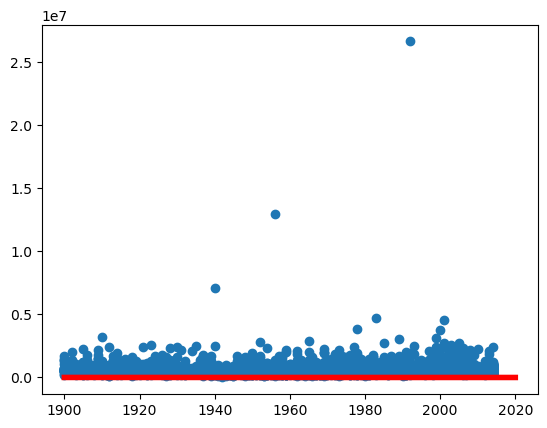

In [314]:
xs=np.linspace(1900,2020,endpoint=True)
#ys=a[0]+a[1]*xs
ys=a[3]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x['yr_built'],y)
plt.show()

Yr_built feature alone is not showing any impact on house price over the years. Though there are few outliers around 1960 and 2000. 

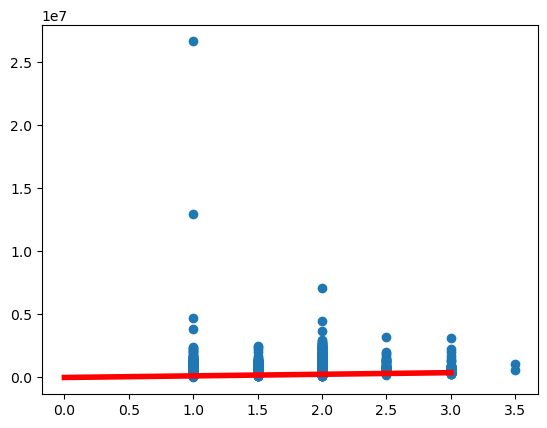

In [315]:
xs=np.linspace(0,3,endpoint=True)
ys=a[2]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x['floors'],y)
plt.show()

Floor is numeric discrete variable. Regression line around the  scatter plot is showing little rise in house price with increase in number of floors in a house.There are few exception though happened around first floor..

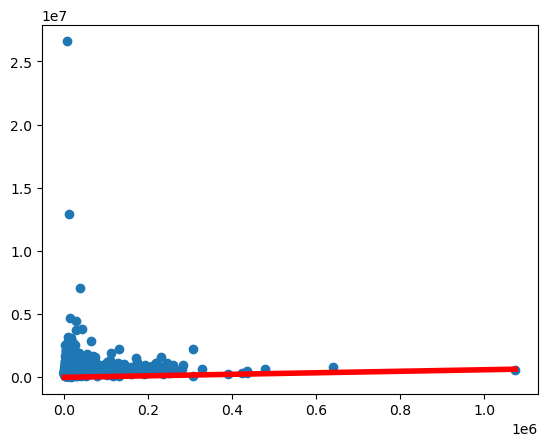

In [316]:
xs=np.linspace(638,1074218,endpoint=True)
ys=a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x['sqft_lot'],y)
plt.show()

Sqft_lot is numeric continuous variable. Regression line around the  scatter plot is showing little rise in house price with increase in number of sqft_lot in a house.There are data clumping happened around lower sqft_lot.

# ---------------------   END of PART 2   --------------------------------------------------------------